In [1]:
import pandas as pd # for numerical operations
import numpy as np # to create data structures
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
import math # for mathamaticals operations
from matplotlib import pyplot 
from numpy import mean # for finding mean values
from numpy import std # for finding standard deviation 
import warnings # To remove warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler # for scaling the data to make in one range
from sklearn.linear_model import LinearRegression # for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor # for model building
from sklearn.model_selection import train_test_split # for splitting the data into train and test set
from sklearn.metrics import mean_absolute_error # for evaluating model
from sklearn.metrics import mean_squared_error # for evaluating model
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
from sklearn.neighbors import KNeighborsClassifier # for model building
from sklearn.metrics import confusion_matrix # for evaluating  the model
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score # for evaluating the model
from sklearn.preprocessing import StandardScaler # for standardize features by removing the mean and scalling to unit variance
from  sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn.datasets import make_blobs # used to generate blobs of point with Gaussian distribution
from sklearn.cluster import KMeans # K-Means Algorithm to cluster the data
from sklearn.cluster import AgglomerativeClustering 
from sklearn import metrics
from sklearn.datasets import make_circles # making circles 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score # Finding optimum value of K and cluster efficiency
from sklearn.cluster import DBSCAN # fitting the DBSCAN to the dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors#Evaluate the optimum values of Hyperparameters
from tabulate import tabulate
from sklearn.metrics import mean_absolute_error,mean_squared_error
from ipywidgets import interact

In [2]:
#Loading data file
house_df=pd.read_csv("C:/Users/Saud Shaikh/Downloads/Project2_Classification_HouseGrade_Data_Project-625edbc5-68f4-4fe4-97f2-29ba63a71a0e.csv")

# Exploring The Data

In [3]:
#Preview the data file
house_df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [4]:
#getting dataset Info
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [5]:
#Describing the data
house_df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [6]:
#Shape of the dataset
house_df.shape

(3000, 14)

In [7]:
#getting columns of dataset
house_df.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [8]:
#Missing Values 
house_df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

We find that there is no missing value exist in this dataset,so we skip the missing value treatment

## Setting the index 

In [9]:
house_df=house_df.set_index('Id')
house_df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,,,,,,,,,,,,,
1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


# Categorizing the Data 

In [10]:
cat=[]
con=[]

for i in house_df.columns:
    if house_df[i].nunique()<50:
        cat.append(i)
    else:
        con.append(i)

print(tabulate({"Categorical":cat,
                "Continuous": con}, headers = ["categorical", "continuous"]))           

categorical    continuous
-------------  --------------
Trooms         Area(total)
Nbedrooms      Roof(Area)
Nbwashrooms    Lawn(Area)
Twashrooms     API
roof           Expected price
Nfloors
ANB
Grade


In [1]:
for i in house_df.columns:
    print(i,':-',house_df[i].nunique())

NameError: name 'house_df' is not defined

In [12]:
for i in house_df.columns:
    if house_df[i].nunique()<50:
        print(i,':',house_df[i].unique())

Trooms : [6 5 7 8 9]
Nbedrooms : [5 4 7 8 6 3 2]
Nbwashrooms : [4 3 6 7 5 2 8 1]
Twashrooms : [ 6  4  5  7  9  8  3  2 10]
roof : ['NO' 'YES']
Nfloors : [2 3 5 6 1 4 7]
ANB : [6 4 3 2 1 5]
Grade : ['D' 'C' 'B' 'A' 'E']


# EDA

## Categorical Data 

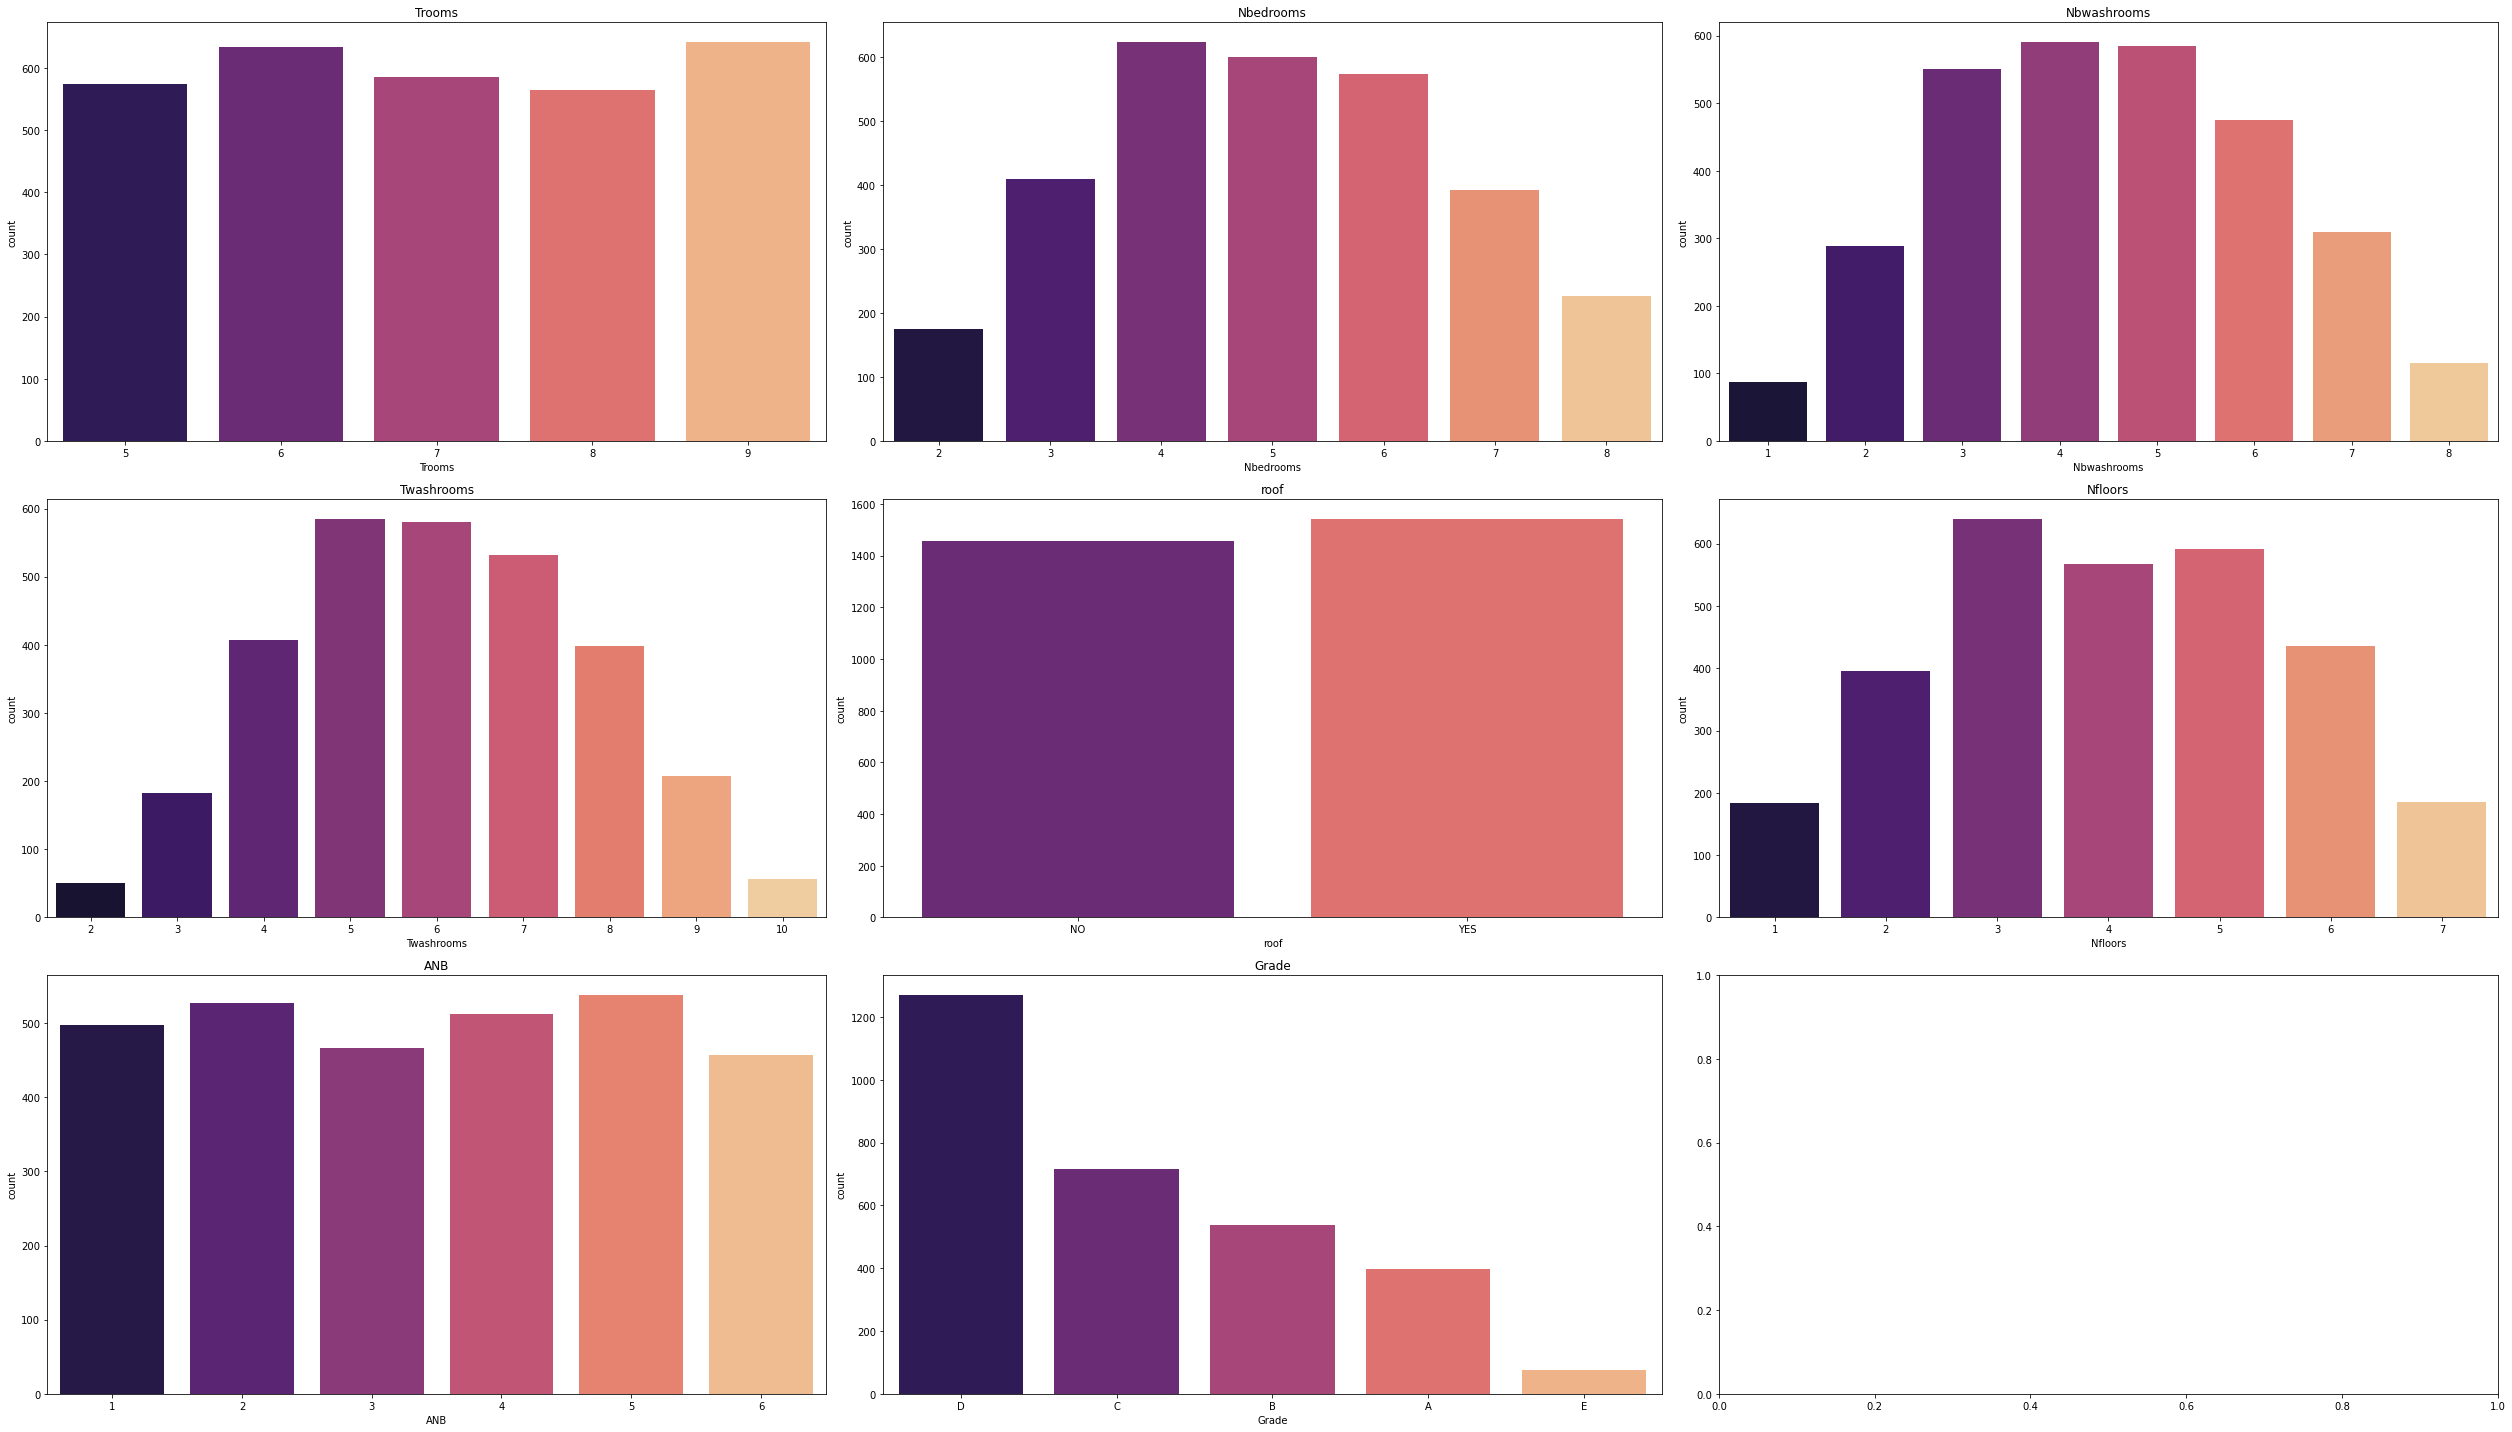

In [13]:
r=3
c=int(len(cat)/r)+1

figs,axes =plt.subplots(c,r,figsize=(35,20),tight_layout=True)

for i , ax in zip(cat,axes.flatten()[:len(cat)]):
    sns.countplot(data=house_df,x=house_df[i],palette='magma',ax=ax)
    ax.set_title(i)
plt.show()   

# Continuos Data 

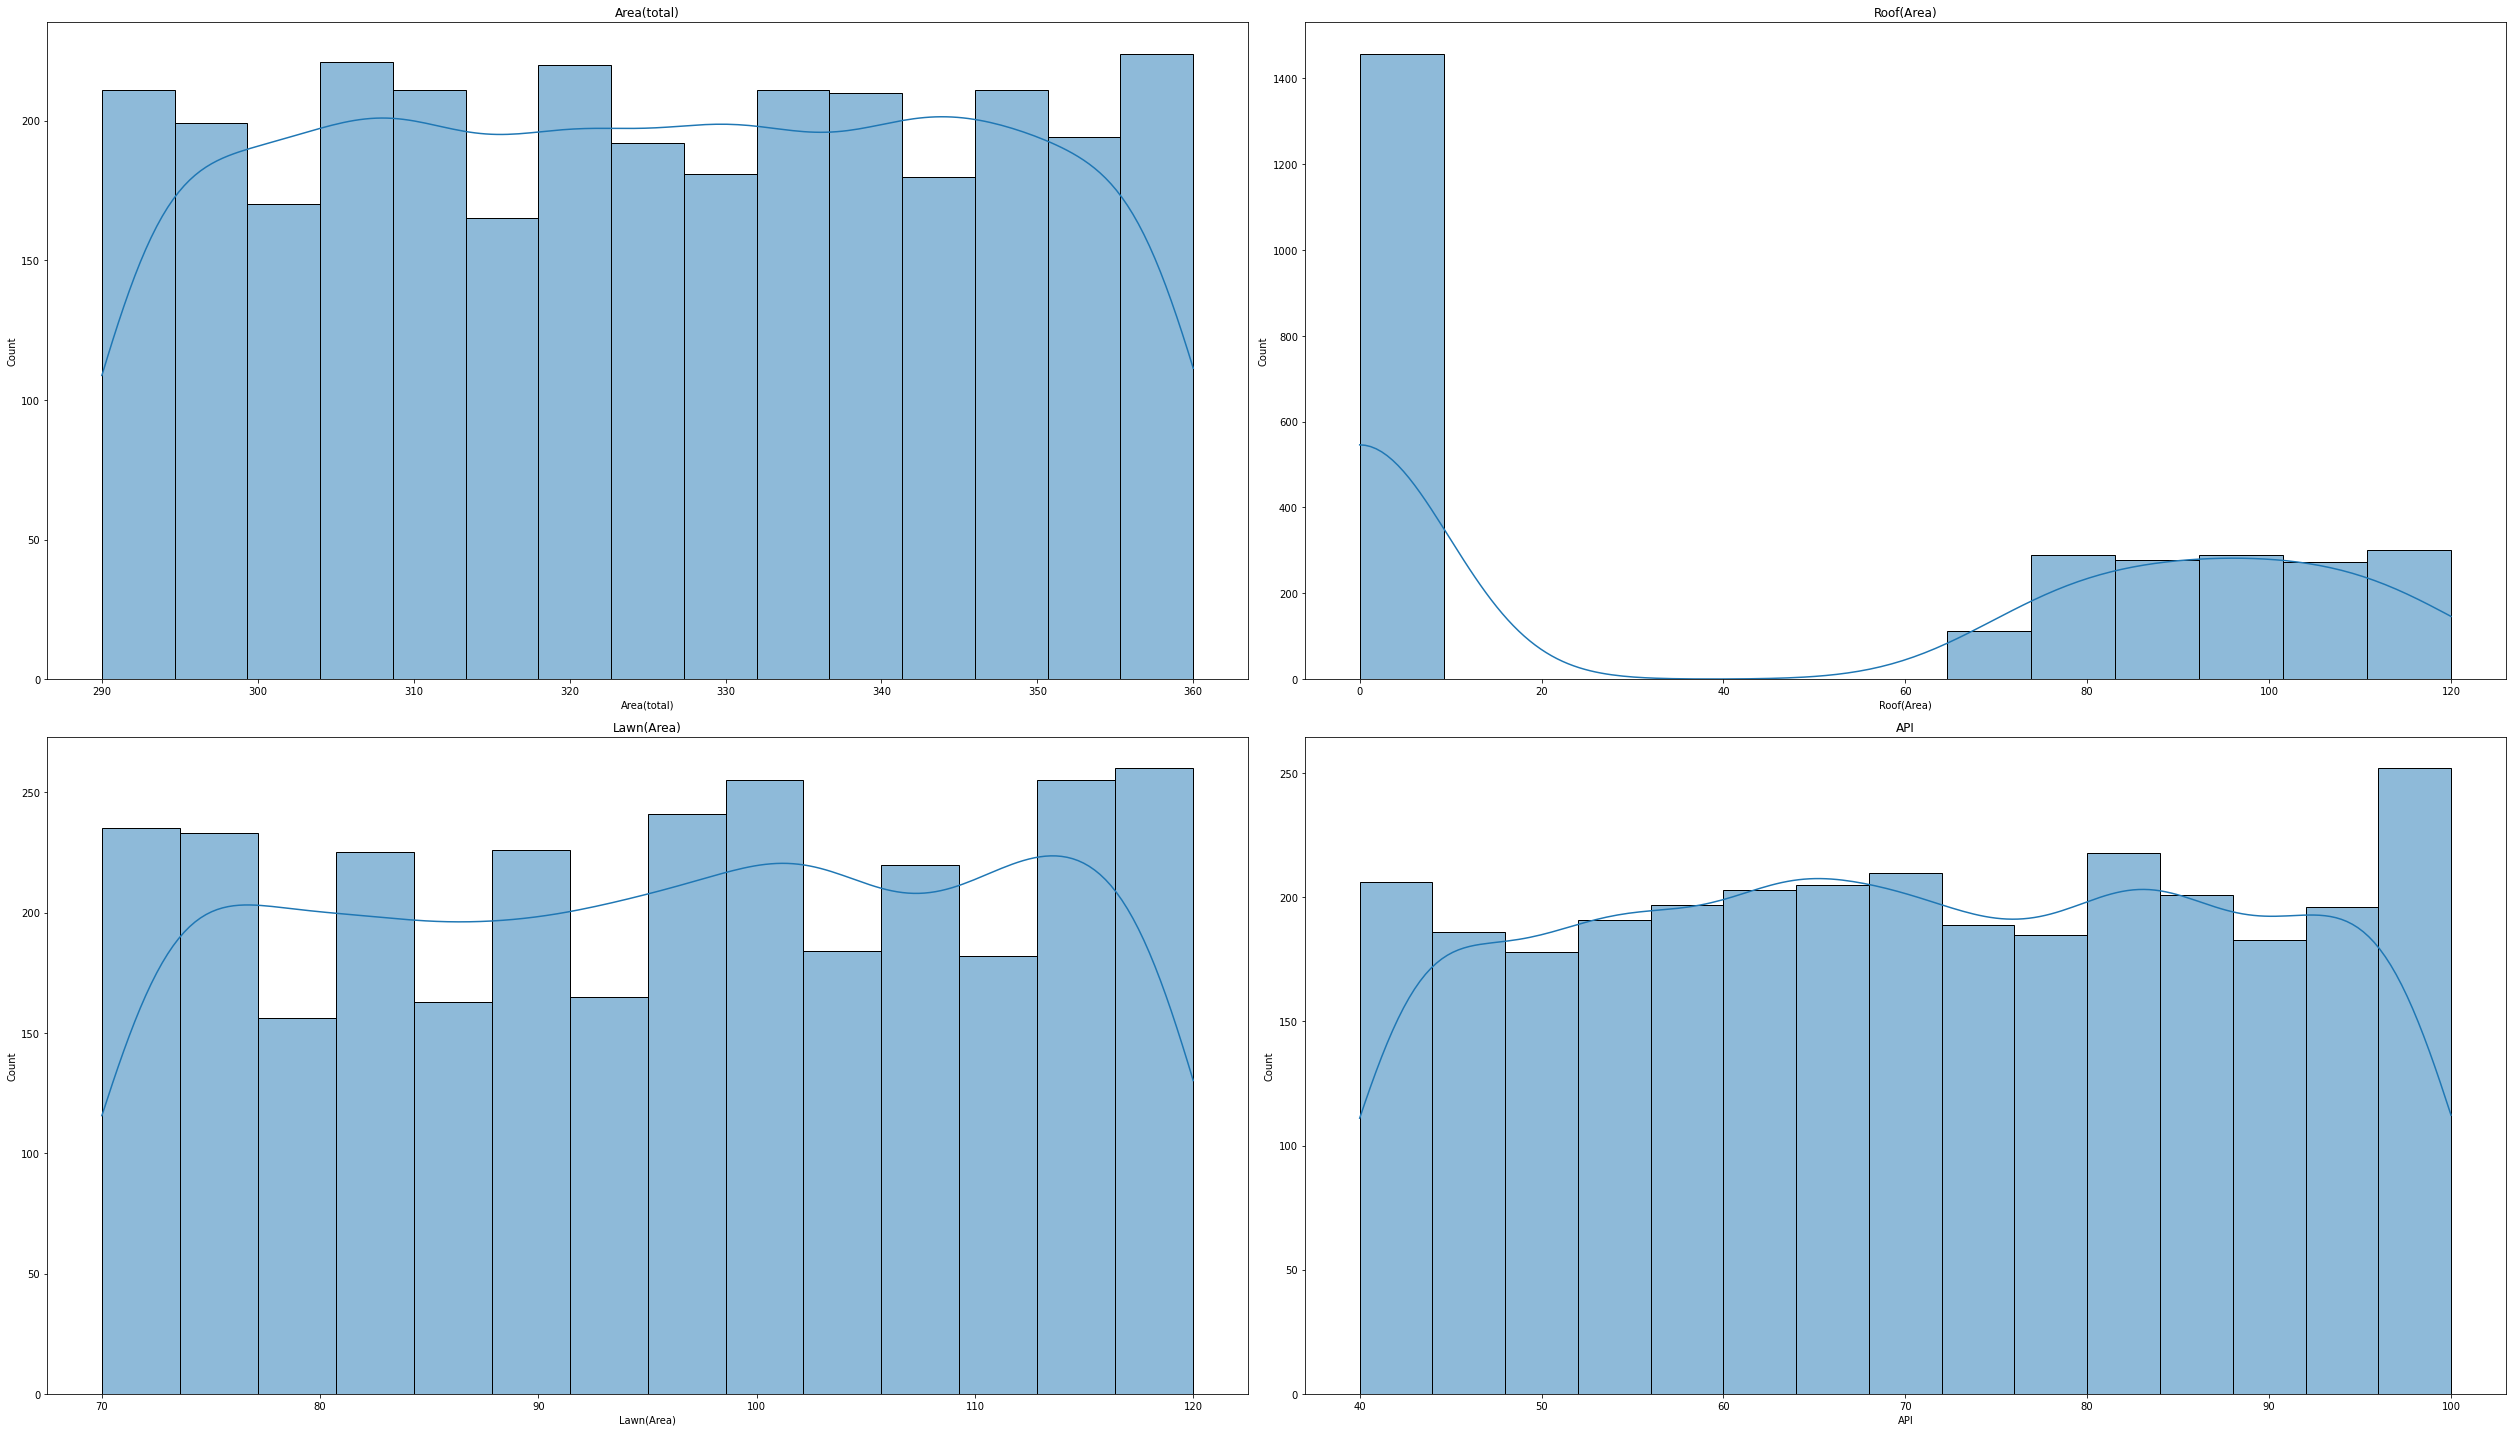

In [14]:
r=2
c=int(len(con)/r)
figs,axes =plt.subplots(c,r,figsize=(35,20),tight_layout=True)
for i , ax in zip(con,axes.flatten()[:len(con)]):
    sns.histplot(data=house_df,x=house_df[i].values,palette='magma',ax=ax,kde=True)
    ax.set_xlabel(i)
    ax.set_title(i)
plt.show()  

### Interactive Univariate Analysis of Categorical Variables

In [15]:
def cat_info(col): 
    print(f"Unique values in {house_df.columns[col]} are: {house_df.iloc[:,col].unique()}") 
    print(f"Mode of {house_df.columns[col]} is {house_df.iloc[:,col].mode()[0]}") 
    print(f"Number of missing values in {house_df.columns[col]} is {house_df.iloc[:,col].isnull().sum()}") 
    if house_df.iloc[:,col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {house_df.columns[col]} column")

In [16]:
house_df1=house_df[cat]
def cat_vis(col,palette='magma'):
    cat_info(col)
    sns.countplot(data=house_df1,x=house_df1.iloc[:,col],palette=palette)
    plt.title(house_df1.columns[col])
    plt.show()
interact(cat_vis,col=(0,len(house_df1.columns)-1,1),palette=['magma','viridis'],columns=[cat])    

interactive(children=(IntSlider(value=3, description='col', max=7), Dropdown(description='palette', options=('…

<function __main__.cat_vis(col, palette='magma')>

In [17]:
def cat_info(col): 
    print(f"Unique values in {col} are: {house_df[col].unique()}") 
    print(f"Mode of {col} is {house_df[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {house_df[col].isnull().sum()}") 
    if house_df[col].isnull().sum() > 0: 
        print(f"\nThere are null values in the {col} column")

# Analysis of Trooms

In [18]:
cat_info('Trooms')

Unique values in Trooms are: [6 5 7 8 9]
Mode of Trooms is 9
Number of missing values in Trooms is 0


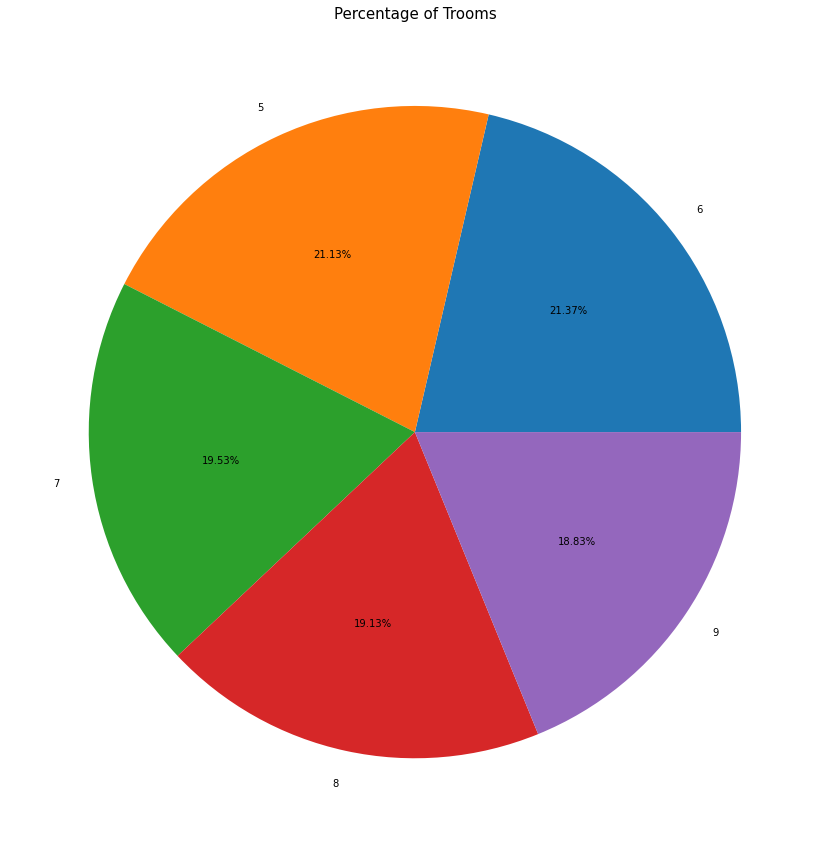

In [19]:
plt.figure(figsize=(30,15))
plt.title('Percentage of Trooms',fontsize=15)
plt.pie(house_df['Trooms'].value_counts(),labels=house_df['Trooms'].unique(),autopct='%0.2f%%');

# Analysis of No.Bedrooms

In [20]:
cat_info('Nbedrooms')

Unique values in Nbedrooms are: [5 4 7 8 6 3 2]
Mode of Nbedrooms is 4
Number of missing values in Nbedrooms is 0


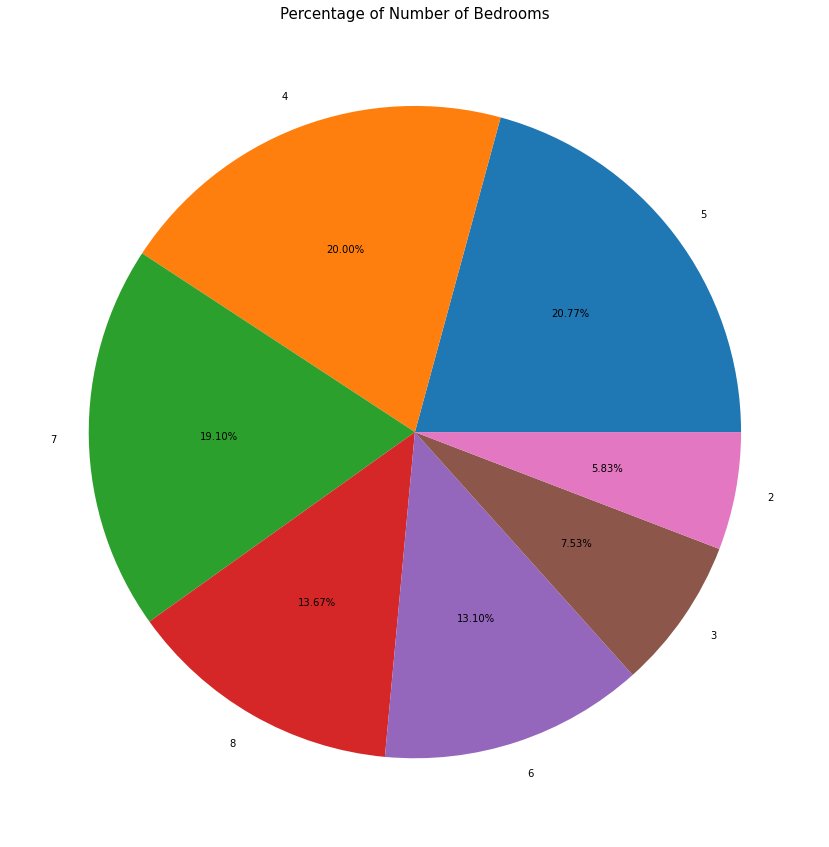

In [21]:
plt.figure(figsize=(30,15))
plt.title('Percentage of Number of Bedrooms',fontsize=15)
plt.pie(house_df['Nbedrooms'].value_counts(),labels=house_df['Nbedrooms'].unique(),autopct='%0.2f%%');

# Analysis of Number of Nbwashrooms 

In [22]:
cat_info('Nbwashrooms')

Unique values in Nbwashrooms are: [4 3 6 7 5 2 8 1]
Mode of Nbwashrooms is 4
Number of missing values in Nbwashrooms is 0


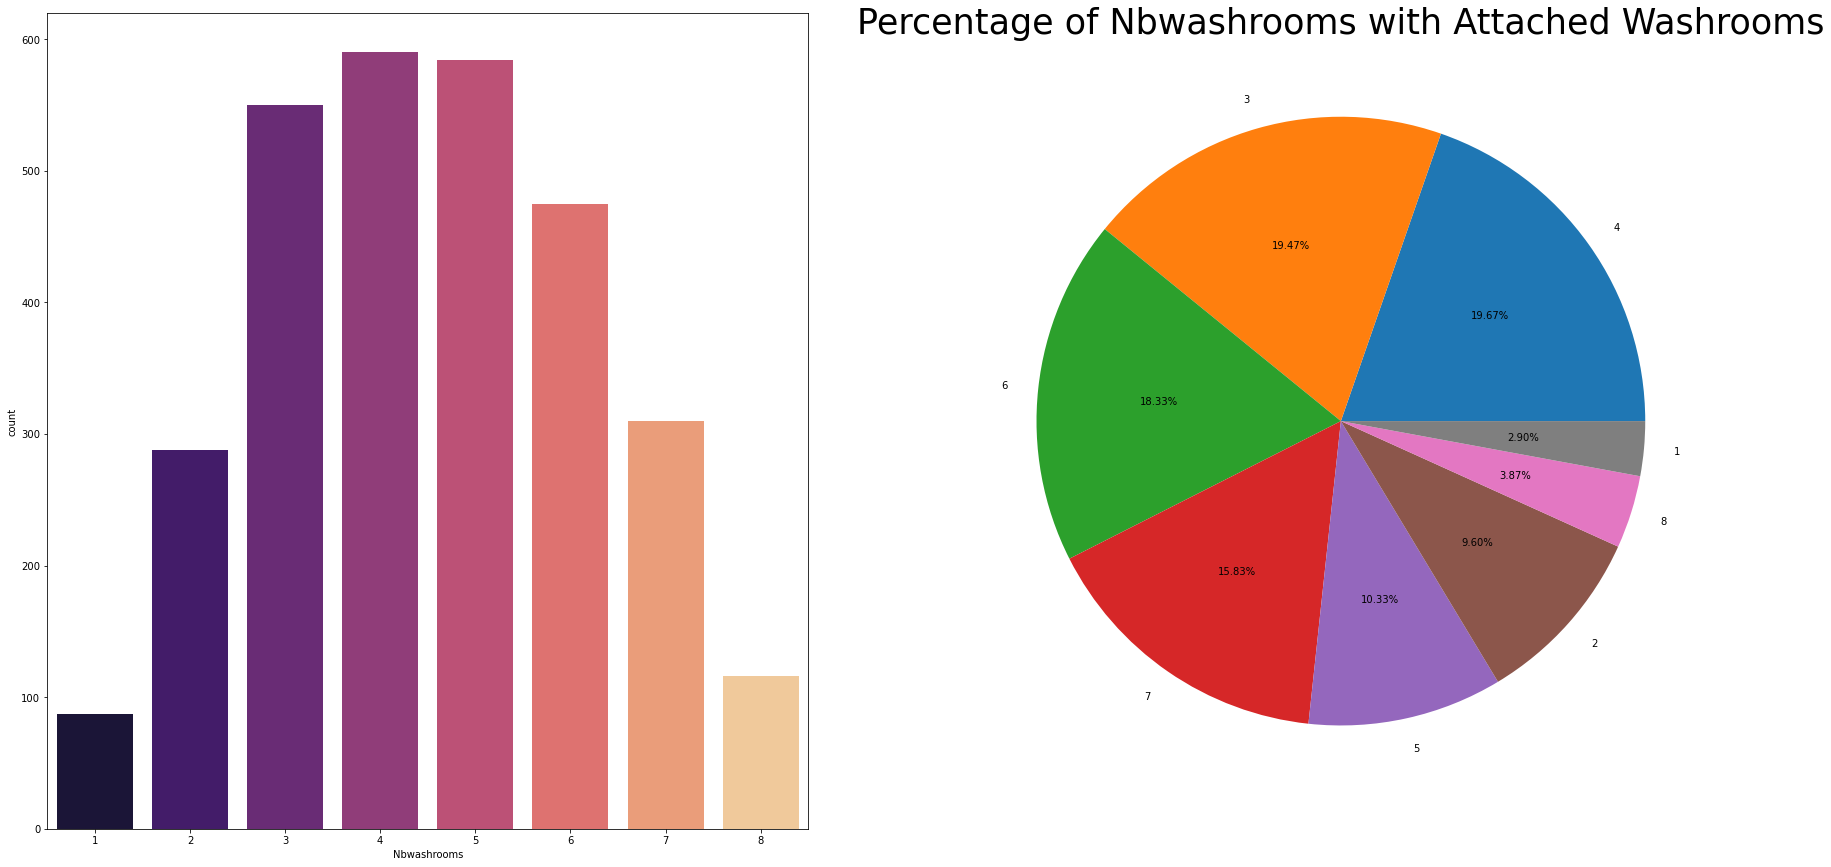

In [23]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.countplot(data=house_df,x=house_df['Nbwashrooms'],ax=axes[0],palette='magma')
ax.set_title('Count of Total Nbwashrooms with Attached Washrooms')
plt.title('Percentage of Nbwashrooms with Attached Washrooms',fontsize=35)
plt.pie(house_df['Nbwashrooms'].value_counts(),labels=house_df['Nbwashrooms'].unique(),autopct='%0.2f%%');

# Analysis of Twashrooms 

In [24]:
cat_info('Twashrooms')

Unique values in Twashrooms are: [ 6  4  5  7  9  8  3  2 10]
Mode of Twashrooms is 5
Number of missing values in Twashrooms is 0


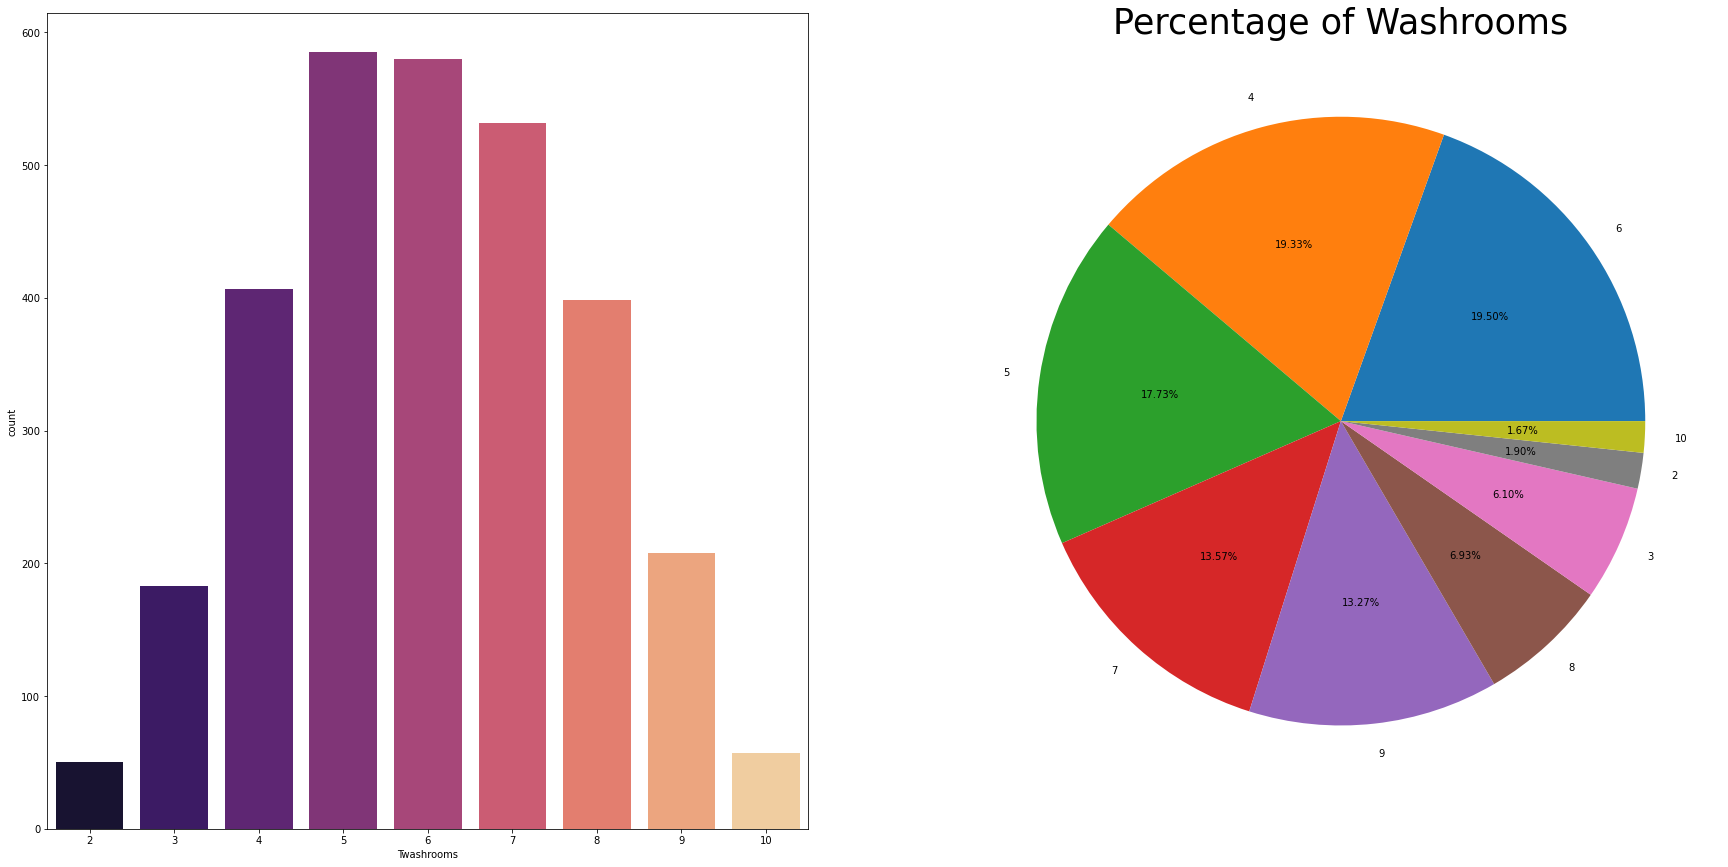

In [25]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.countplot(data=house_df,x=house_df['Twashrooms'],ax=axes[0],palette='magma')
ax.set_title('Count of Total Washrooms')
plt.title('Percentage of Washrooms',fontsize=35)
plt.pie(house_df['Twashrooms'].value_counts(),labels=house_df['Twashrooms'].unique(),autopct='%0.2f%%');

# Analysis of roof

In [24]:
cat_info('roof')

Unique values in roof are: ['NO' 'YES']
Mode of roof is YES
Number of missing values in roof is 0


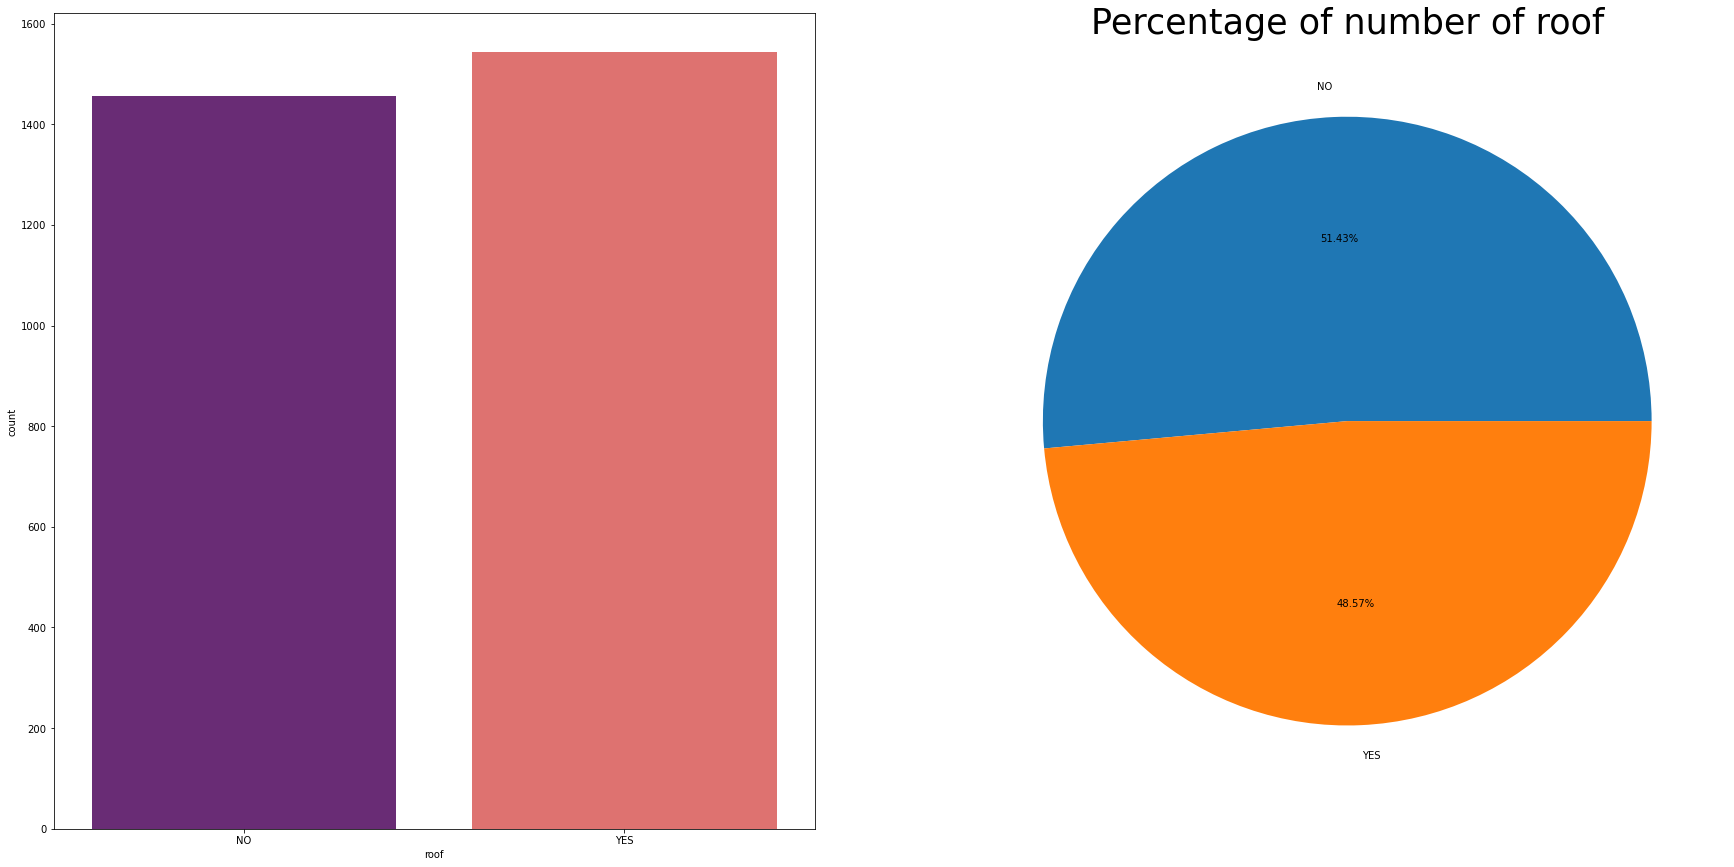

In [25]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.countplot(data=house_df,x=house_df['roof'],ax=axes[0],palette='magma')
ax.set_title('Count of Total roof')
plt.title('Percentage of number of roof',fontsize=35)
plt.pie(house_df['roof'].value_counts(),labels=house_df['roof'].unique(),autopct='%0.2f%%');

# Analysis of Number of Floor

In [26]:
cat_info('Nfloors')

Unique values in Nfloors are: [2 3 5 6 1 4 7]
Mode of Nfloors is 3
Number of missing values in Nfloors is 0


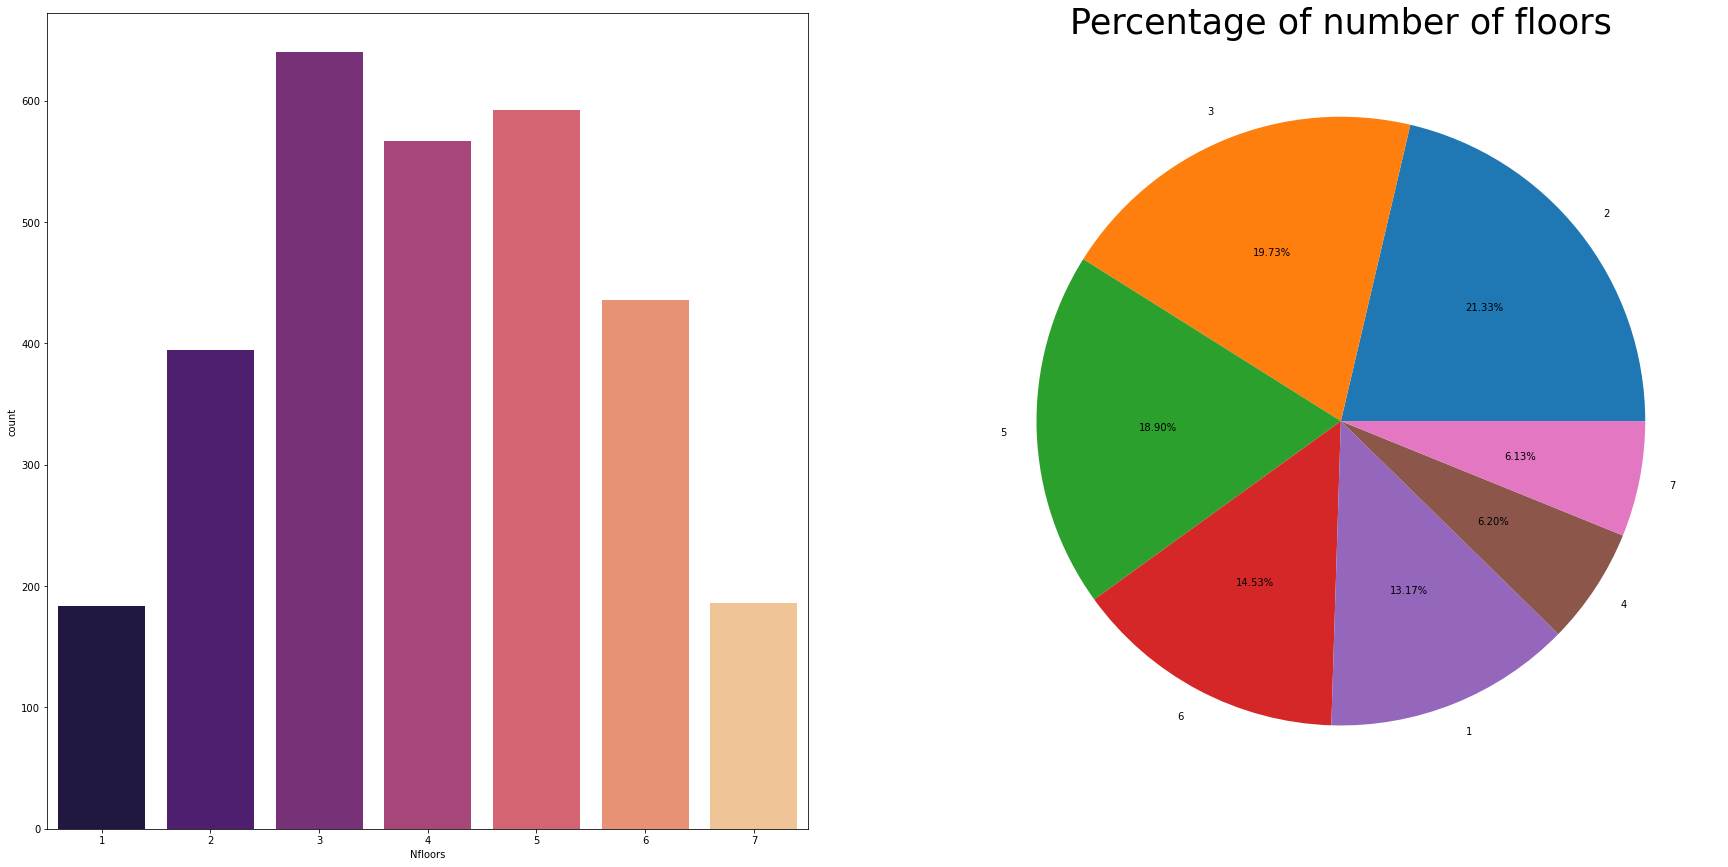

In [27]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.countplot(data=house_df,x=house_df['Nfloors'],ax=axes[0],palette='magma')
ax.set_title('Count of Total number of floors')
plt.title('Percentage of number of floors',fontsize=35)
plt.pie(house_df['Nfloors'].value_counts(),labels=house_df['Nfloors'].unique(),autopct='%0.2f%%');

# Analysis of ANB 

In [28]:
cat_info('ANB')

Unique values in ANB are: [6 4 3 2 1 5]
Mode of ANB is 5
Number of missing values in ANB is 0


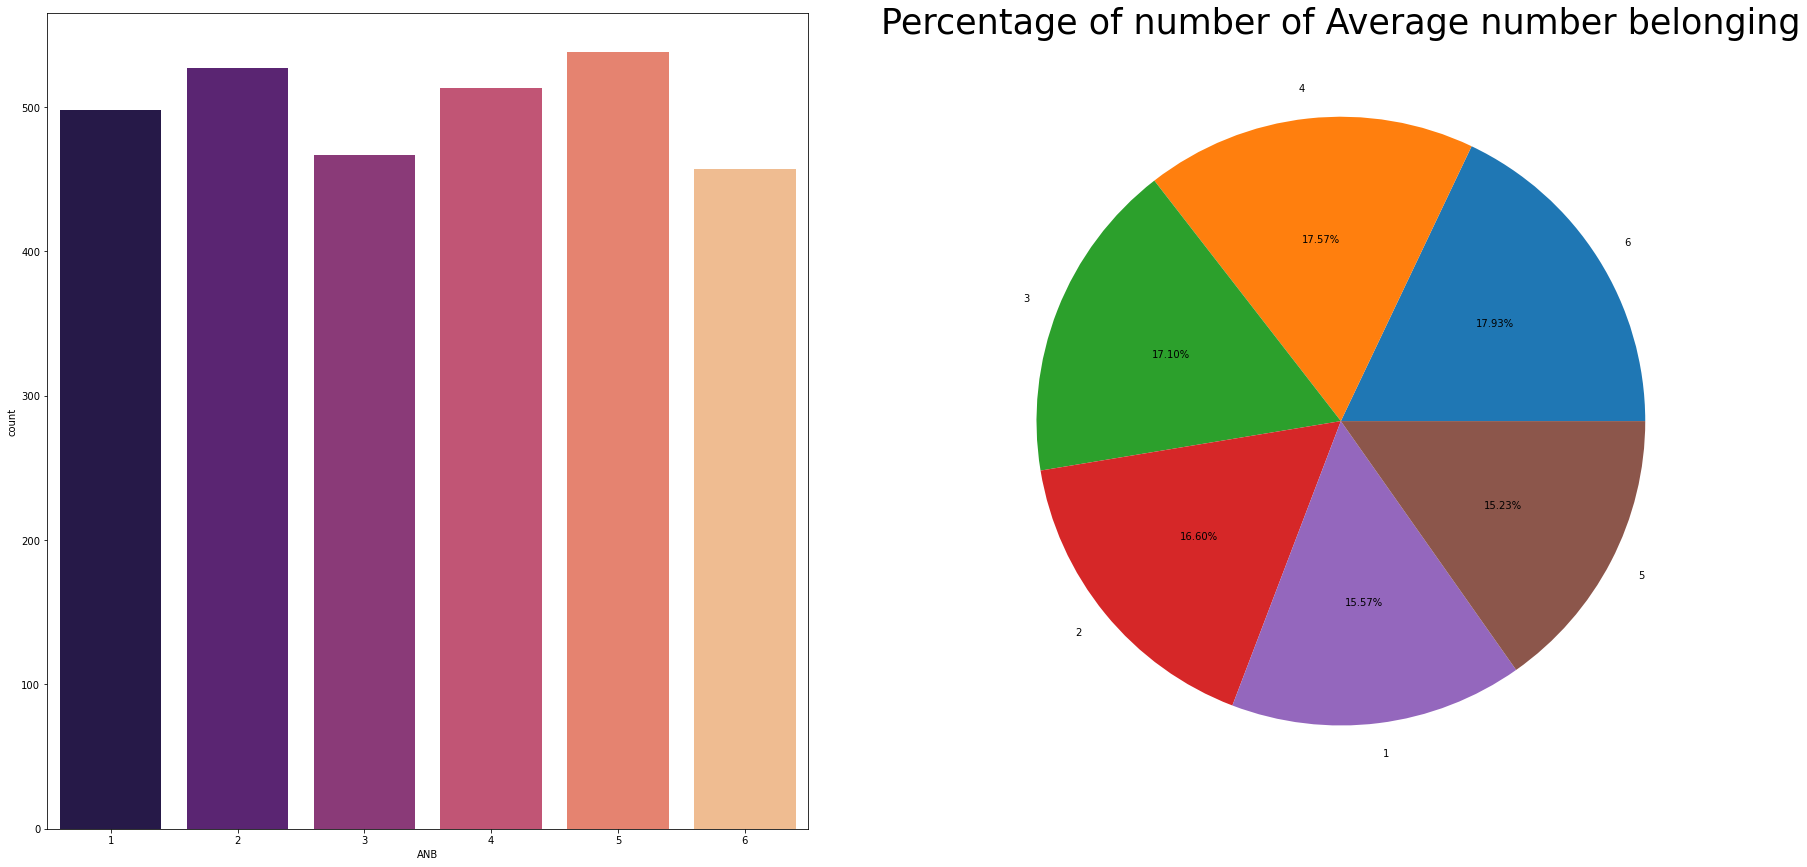

In [29]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.countplot(data=house_df,x=house_df['ANB'],ax=axes[0],palette='magma')
ax.set_title('Count of Total number of Average number belonging')
plt.title('Percentage of number of Average number belonging',fontsize=35)
plt.pie(house_df['ANB'].value_counts(),labels=house_df['ANB'].unique(),autopct='%0.2f%%');

# Analysis of Grade

In [30]:
cat_info('Grade')

Unique values in Grade are: ['D' 'C' 'B' 'A' 'E']
Mode of Grade is D
Number of missing values in Grade is 0


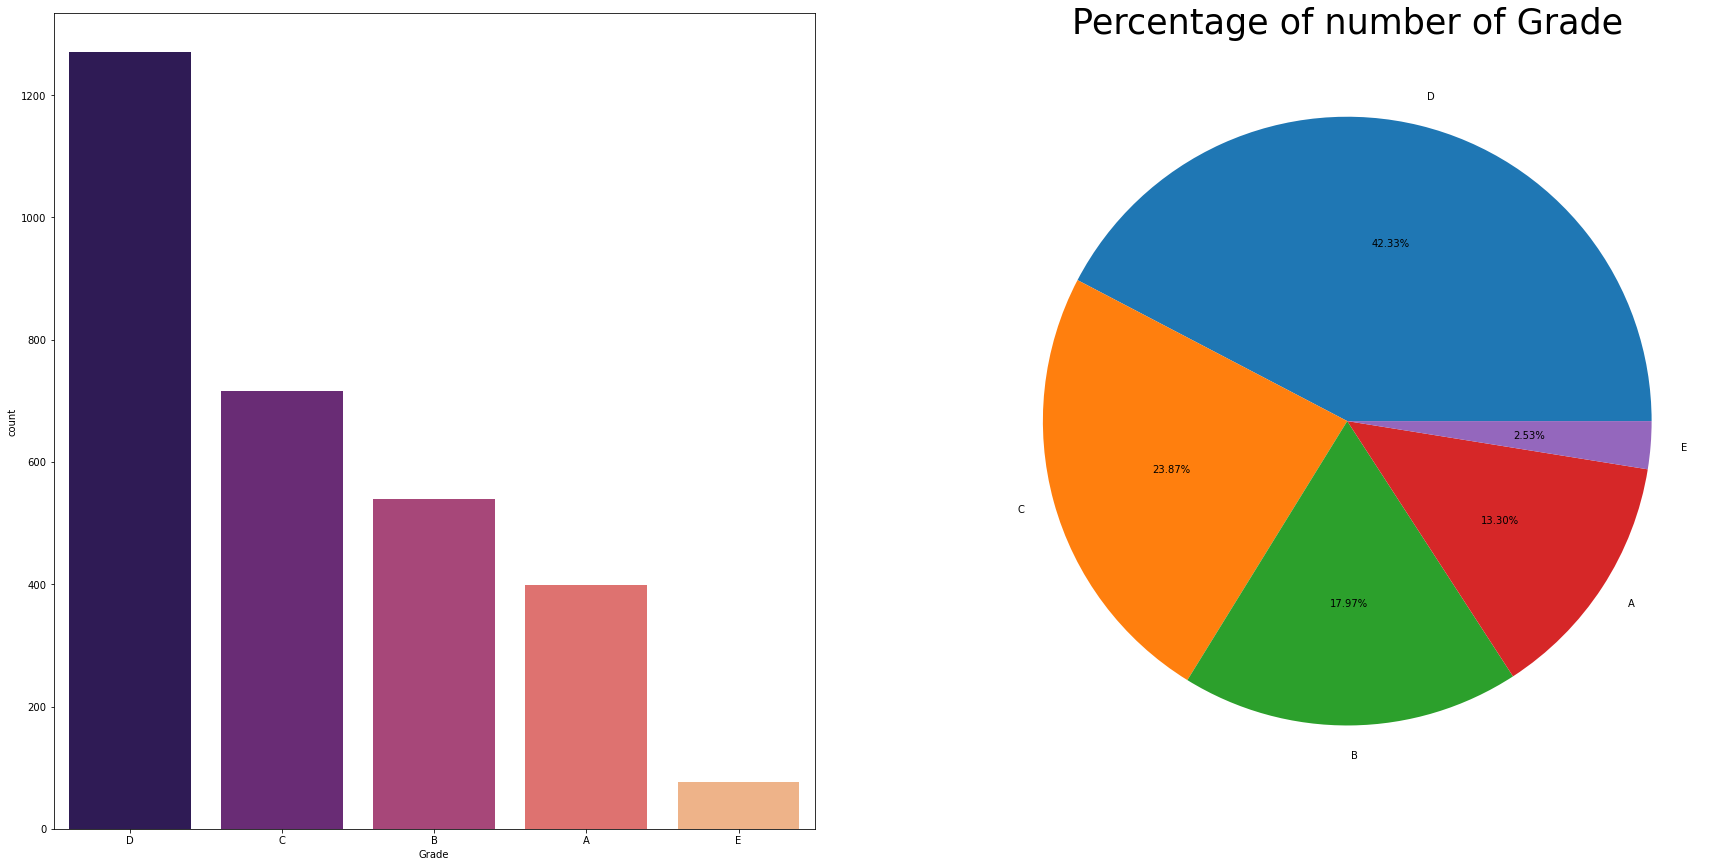

In [31]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.countplot(data=house_df,x=house_df['Grade'],ax=axes[0],palette='magma')
ax.set_title('Count of Total number of Grade')
plt.title('Percentage of number of Grade',fontsize=35)
plt.pie(house_df['Grade'].value_counts(),labels=house_df['Grade'].unique(),autopct='%0.2f%%');

## Univariate Analysis of Numerical(Continuous) Variables

In [32]:
def num_info(col):
    print(f"The mean of the {house_df.columns[col]} is {house_df[house_df.columns[col]].mean()}")
    print(f"The median of the {house_df.columns[col]} is {house_df[house_df.columns[col]].median()}")
    print(f"The standard deviation of the {house_df.columns[col]} is {house_df[house_df.columns[col]].std()}")
    print(f"Number of missing values in the {house_df.columns[col]} is {house_df[house_df.columns[col]].isnull().sum()}")

In [33]:
house_df1=house_df[con]
def con_vis(col,palette='magma'):
    num_info(col)
    figs,axes = plt.subplots(1,2,figsize=(30,15))
    sns.boxplot(data=house_df1,x=house_df1.iloc[:,col],palette=palette,ax=axes[0])
    sns.histplot(data=house_df1,x=house_df1.iloc[:,col],palette=palette,ax=axes[1],kde=True)
    plt.title(house_df1.columns[col])
    plt.show()
interact(con_vis,col=(0,len(house_df1.columns)-1,1),palette=['magma','viridis'],columns=[cat])   

interactive(children=(IntSlider(value=2, description='col', max=4), Dropdown(description='palette', options=('…

<function __main__.con_vis(col, palette='magma')>

# Numerical Analysis 

In [36]:
def num_info(col):
    print(f"The mean of the {col} is {house_df[col].mean()}")
    print(f"The median of the {col} is {house_df[col].median()}")
    print(f"The standard deviation of the {col} is {house_df[col].std()}")
    print(f"Number of missing values in the {col} is {house_df[col].isnull().sum()}")

# Analysis of Area

In [37]:
num_info('Area(total)')

The mean of the Area(total) is 325.117
The median of the Area(total) is 325.0
The standard deviation of the Area(total) is 20.50774244442138
Number of missing values in the Area(total) is 0


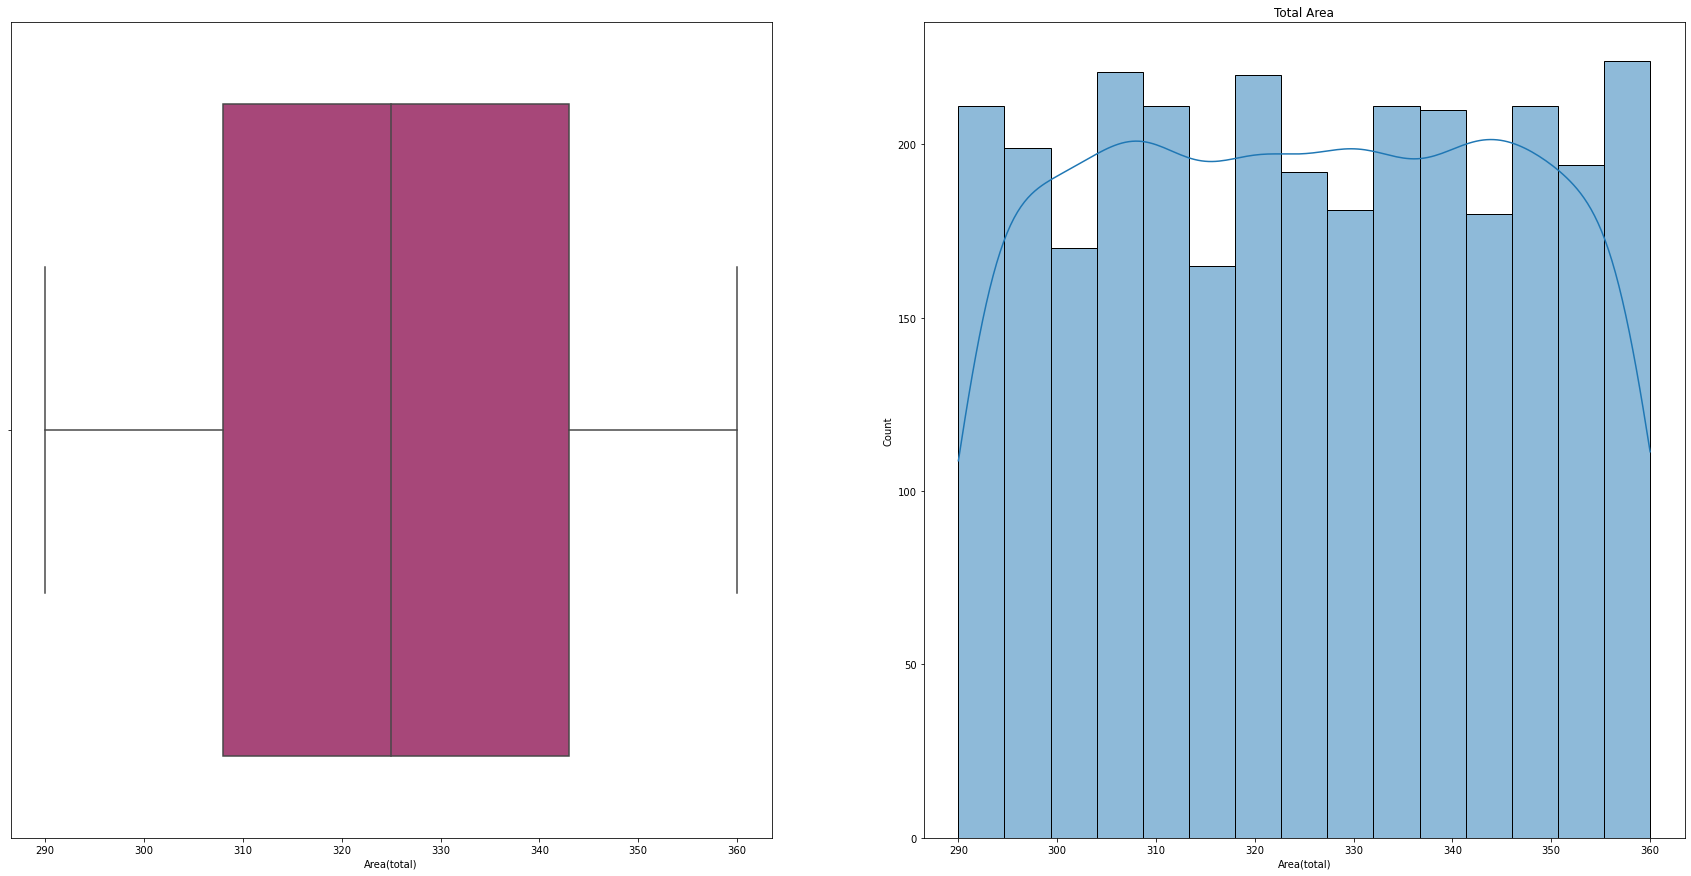

In [38]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.boxplot(data=house_df,x=house_df['Area(total)'],palette='magma',ax=axes[0])
sns.histplot(data=house_df,x=house_df['Area(total)'],palette='magma',ax=axes[1],kde=True)
plt.title('Total Area')
plt.show()

# Analysis of Roof Area

In [39]:
num_info('Roof(Area)')

The mean of the Roof(Area) is 48.980666666666664
The median of the Roof(Area) is 71.0
The standard deviation of the Roof(Area) is 48.74664129867301
Number of missing values in the Roof(Area) is 0


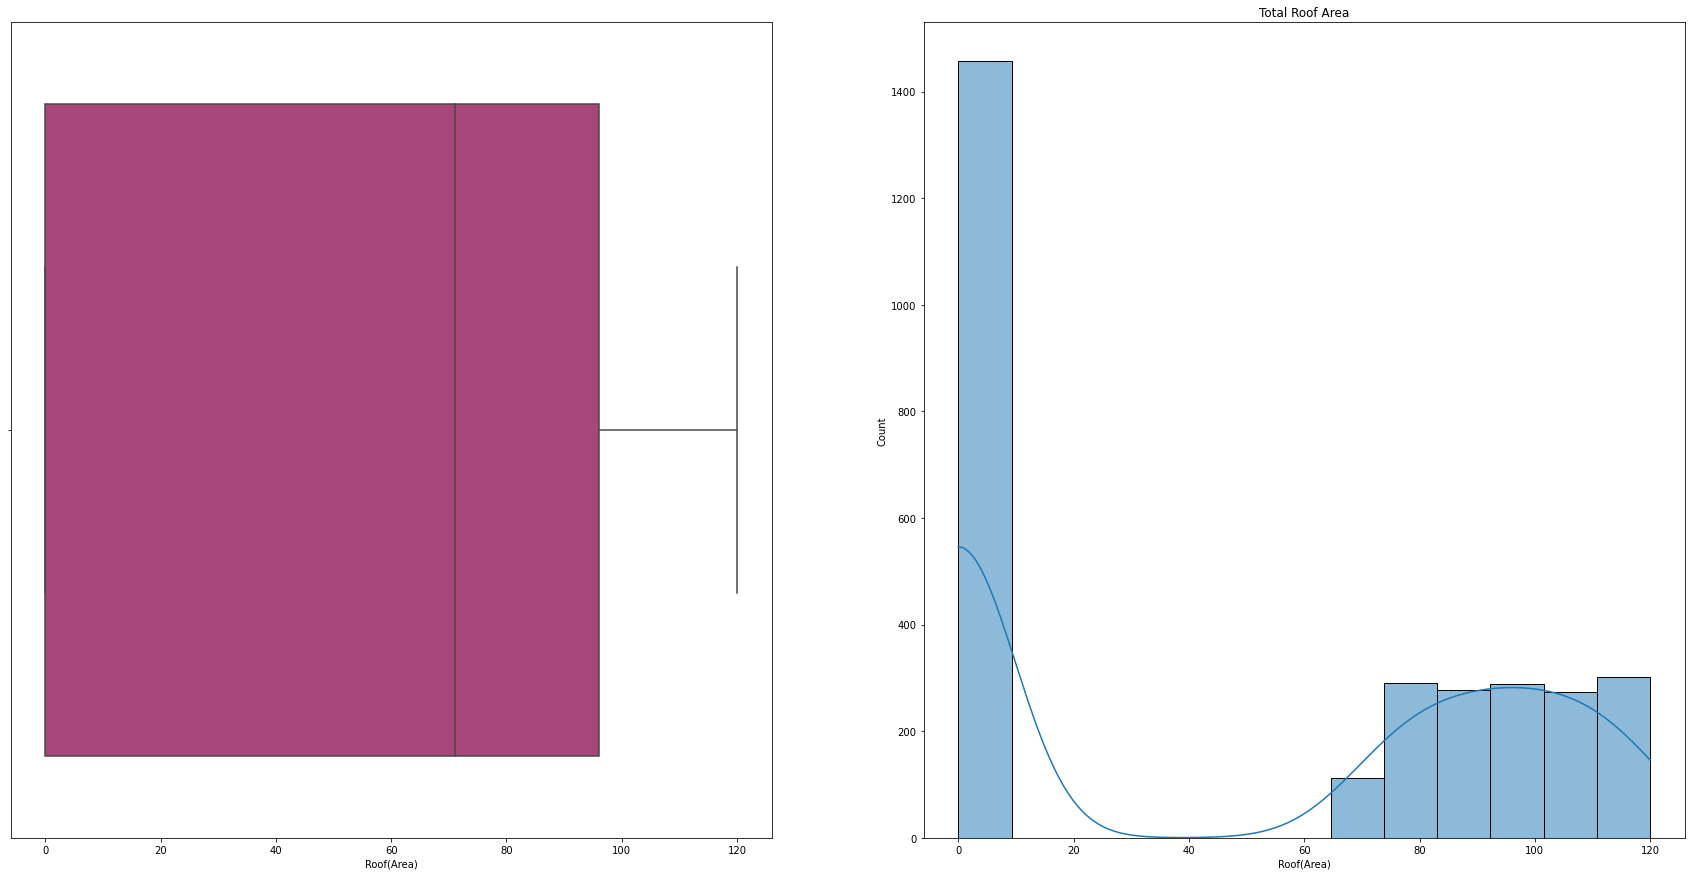

In [40]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.boxplot(data=house_df,x=house_df['Roof(Area)'],palette='magma',ax=axes[0])
sns.histplot(data=house_df,x=house_df['Roof(Area)'],palette='magma',ax=axes[1],kde=True)
plt.title('Total Roof Area')
plt.show()

# Analysis of Lawn Area

In [41]:
num_info('Lawn(Area)')

The mean of the Lawn(Area) is 95.60933333333334
The median of the Lawn(Area) is 96.0
The standard deviation of the Lawn(Area) is 14.83738843555081
Number of missing values in the Lawn(Area) is 0


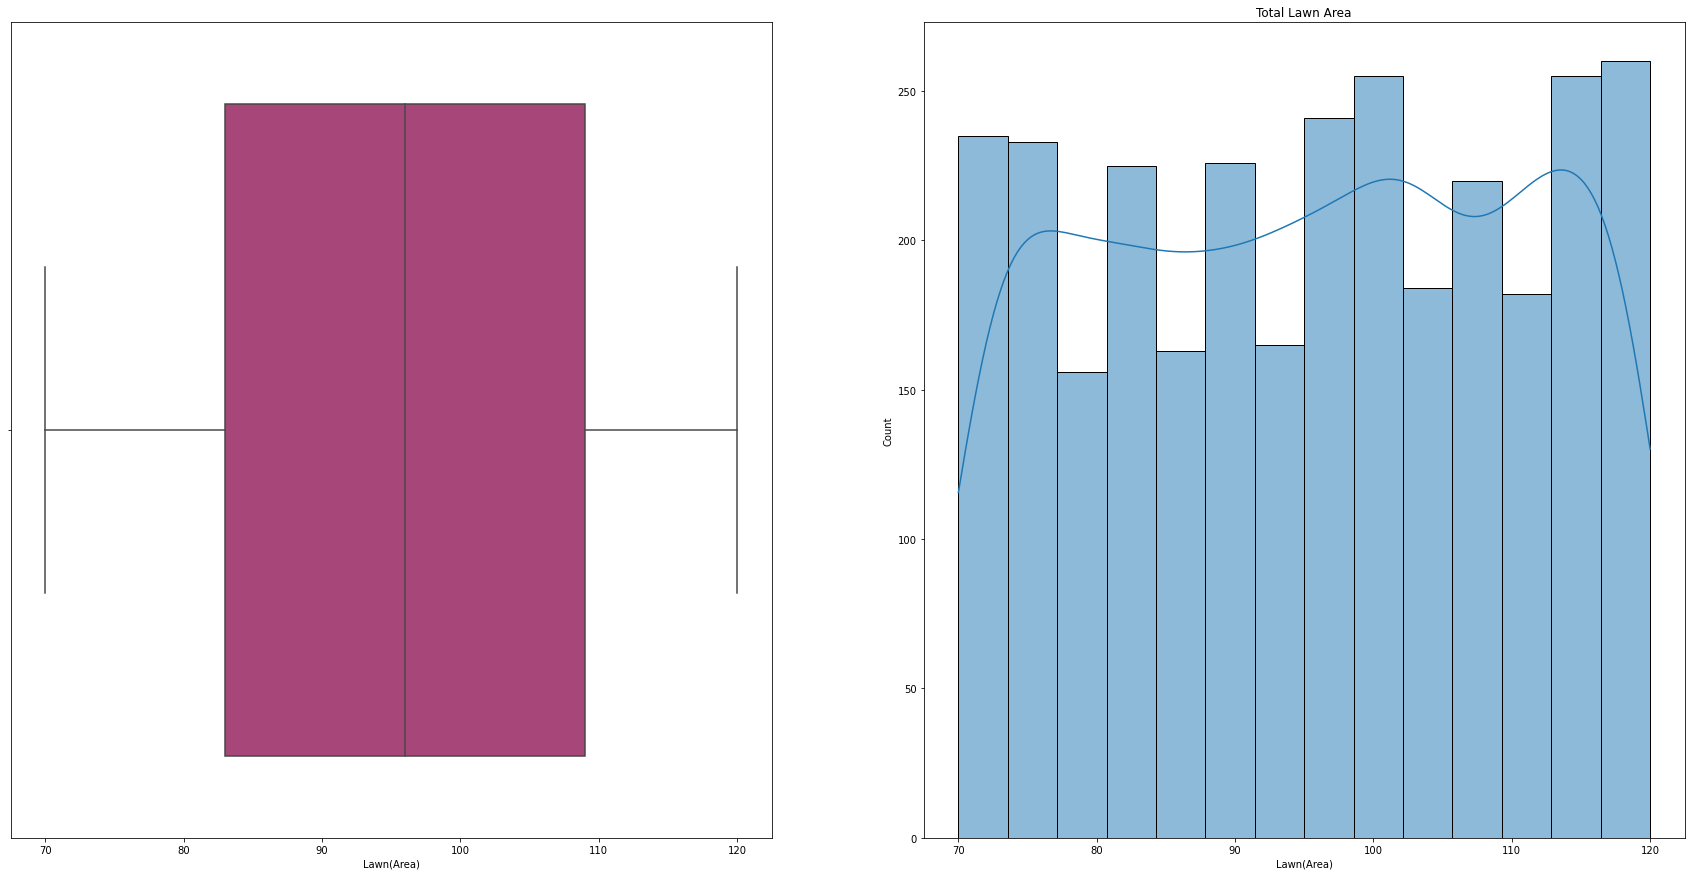

In [42]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.boxplot(data=house_df,x=house_df['Lawn(Area)'],palette='magma',ax=axes[0])
sns.histplot(data=house_df,x=house_df['Lawn(Area)'],palette='magma',ax=axes[1],kde=True)
plt.title('Total Lawn Area')
plt.show()

# Analysis of Air pollution index level(API)

In [43]:
num_info('API')

The mean of the API is 70.19066666666667
The median of the API is 70.0
The standard deviation of the API is 17.563460306410814
Number of missing values in the API is 0


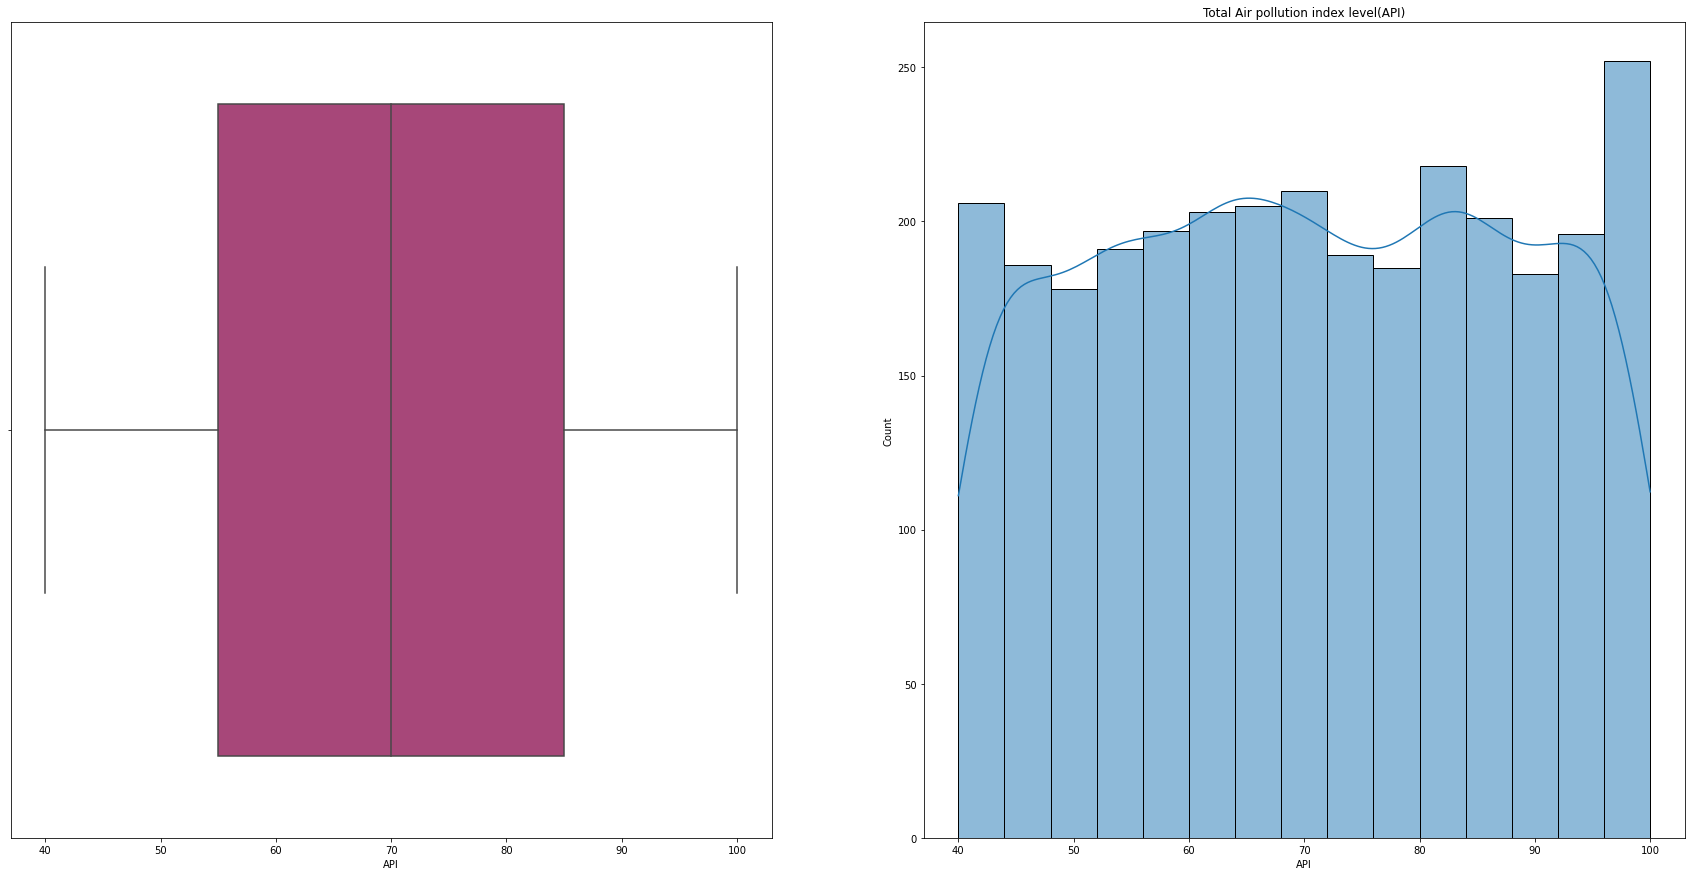

In [44]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.boxplot(data=house_df,x=house_df['API'],palette='magma',ax=axes[0])
sns.histplot(data=house_df,x=house_df['API'],palette='magma',ax=axes[1],kde=True)
plt.title('Total Air pollution index level(API)')
plt.show()

# Analysis of Expected Price

In [45]:
num_info('Expected price')

The mean of the Expected price is 3782.9383333333335
The median of the Expected price is 3771.0
The standard deviation of the Expected price is 567.1899952345067
Number of missing values in the Expected price is 0


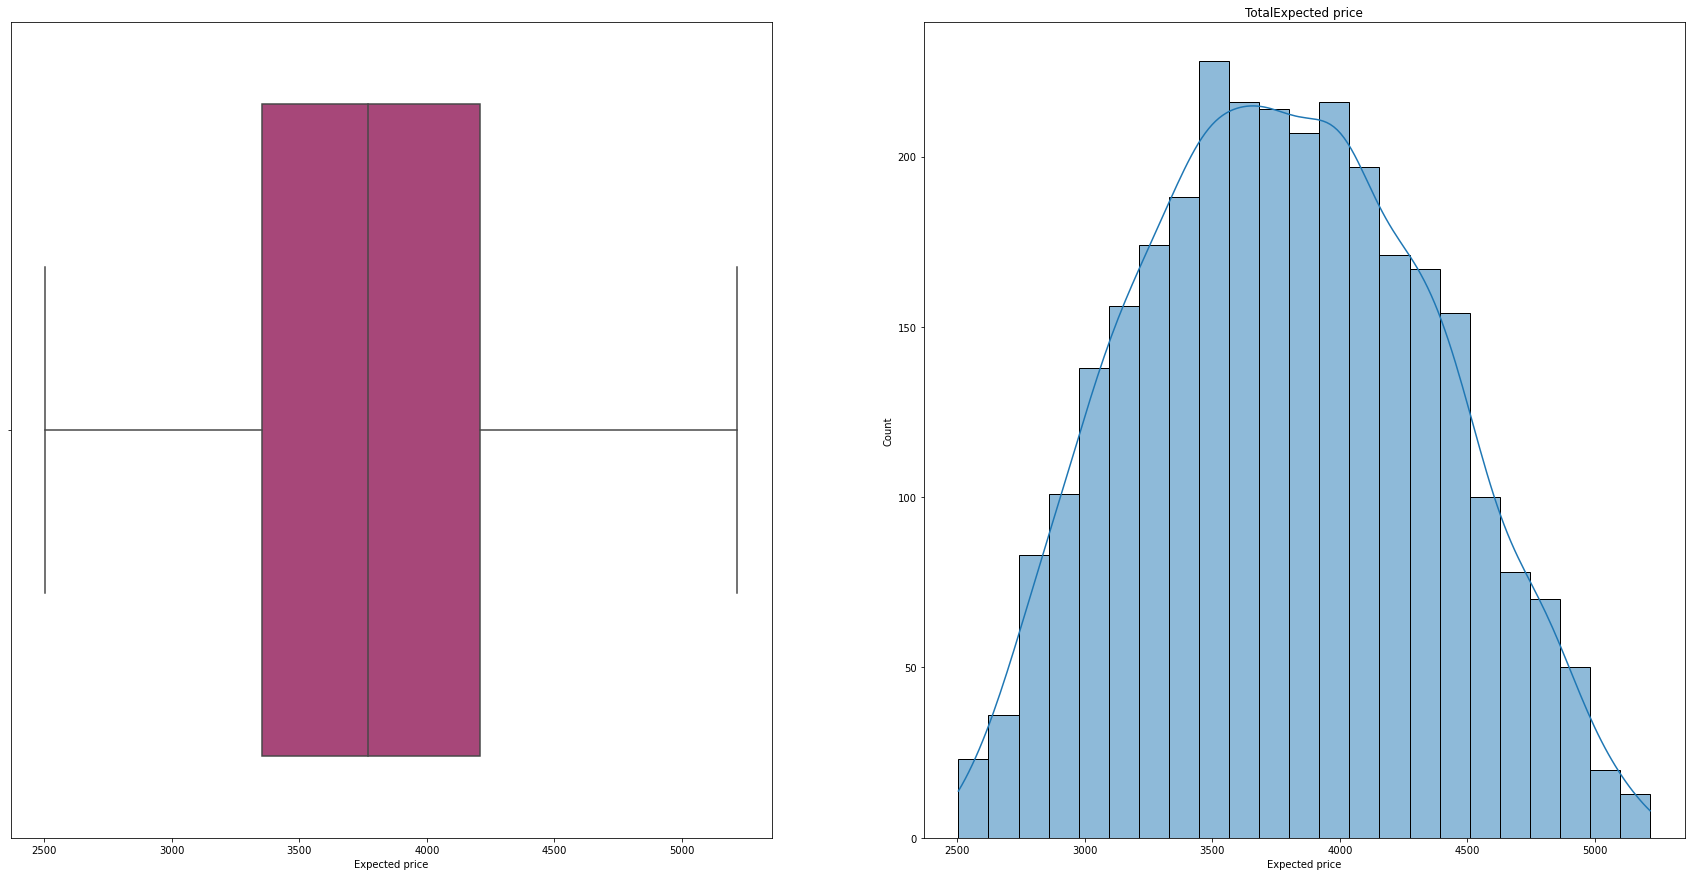

In [46]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.boxplot(data=house_df,x=house_df['Expected price'],palette='magma',ax=axes[0])
sns.histplot(data=house_df,x=house_df['Expected price'],palette='magma',ax=axes[1],kde=True)
plt.title('TotalExpected price')
plt.show()

# Bivariate Analysis of variables

 # Expected price vs Grade 

<AxesSubplot:xlabel='Grade', ylabel='Expected price'>

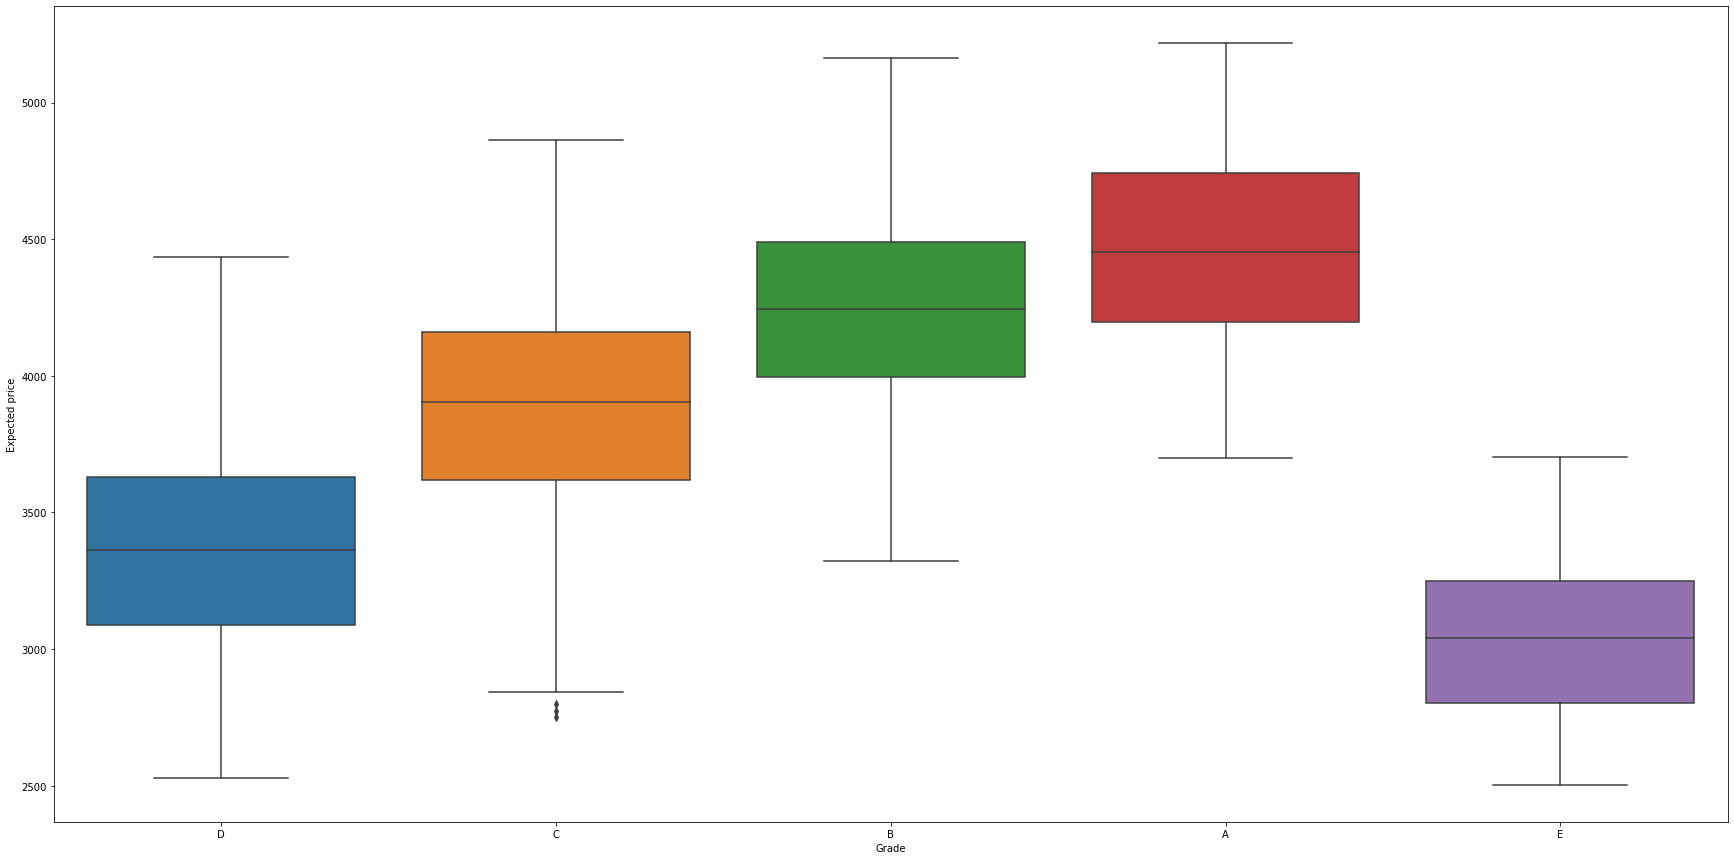

In [47]:
plt.figure(figsize=(30,15))
sns.boxplot(data=house_df,x=house_df['Grade'],y=house_df['Expected price'])

# Grade vs Roof(Area)

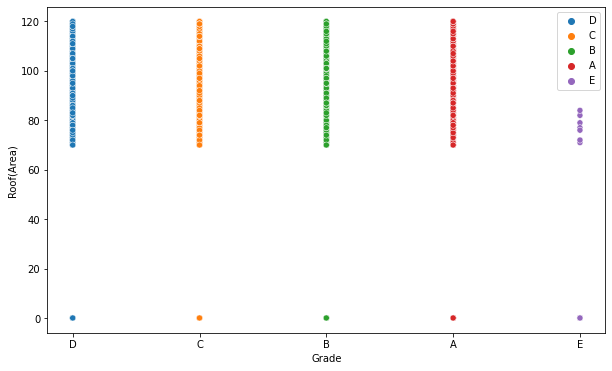

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=house_df,x=house_df['Grade'],y=house_df['Roof(Area)'],hue='Grade')
plt.legend()
plt.show()

# Grade vs Area

<AxesSubplot:xlabel='Grade', ylabel='Area(total)'>

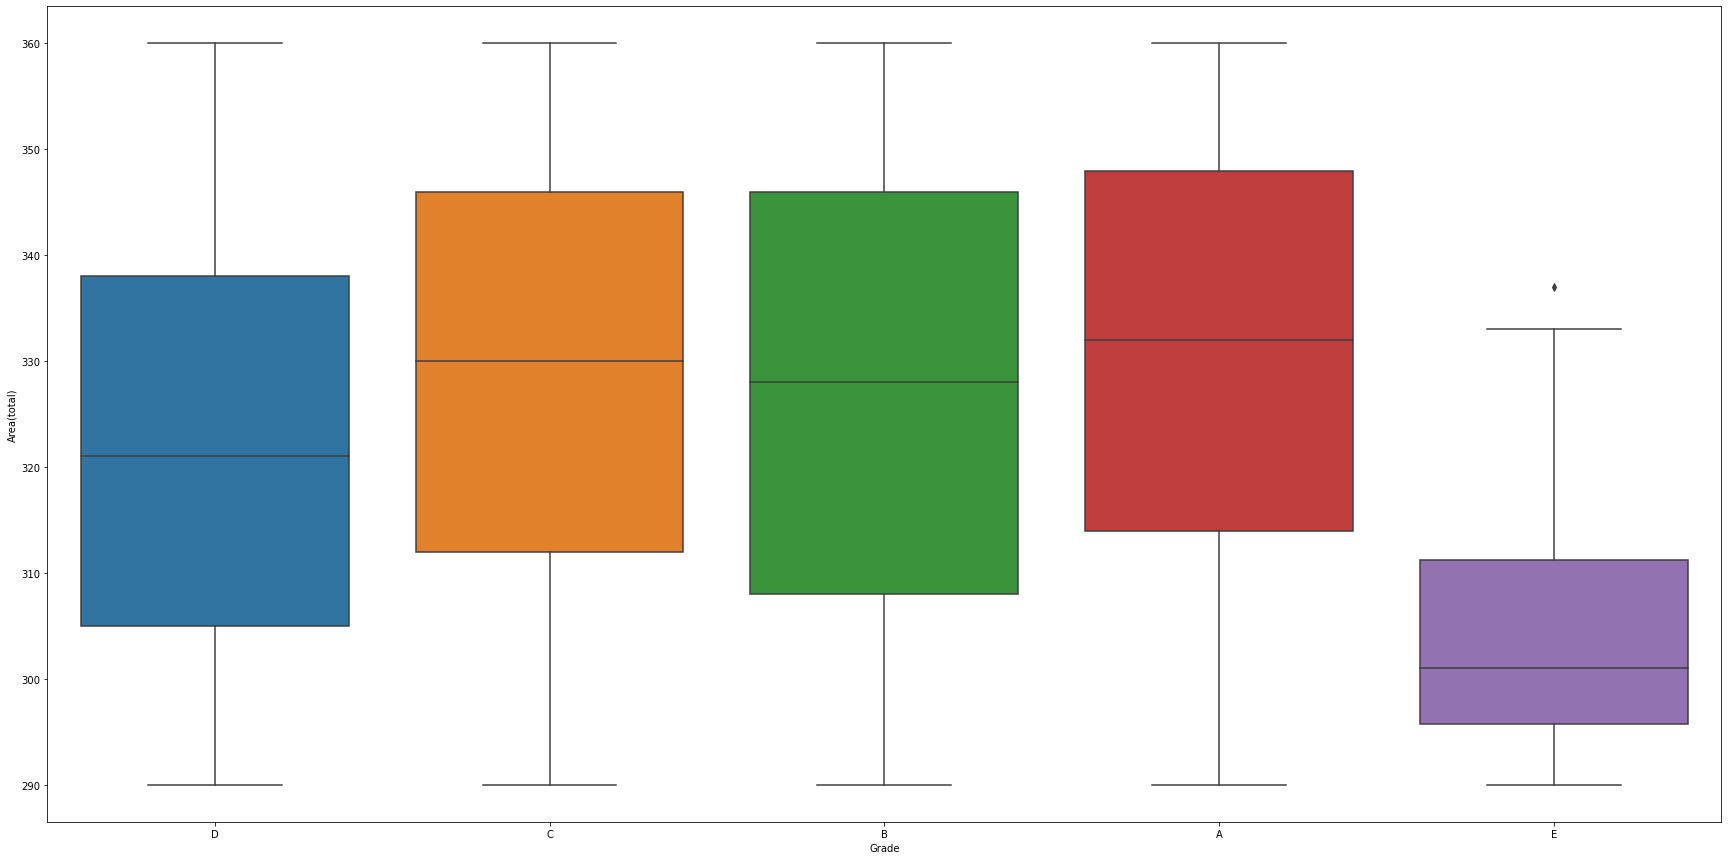

In [49]:
plt.figure(figsize=(30,15))
sns.boxplot(data=house_df,x=house_df['Grade'],y=house_df['Area(total)'])

# Grade vs API

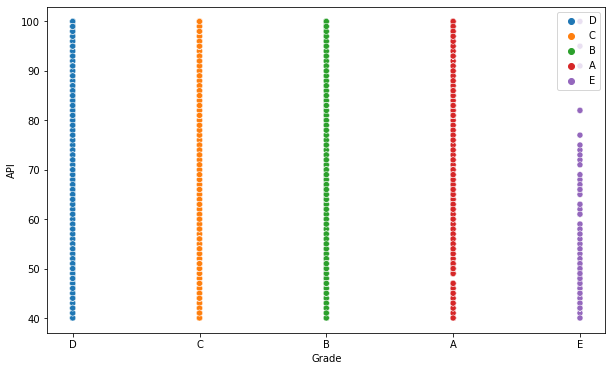

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=house_df,x=house_df['Grade'],y=house_df['API'],hue='Grade')
plt.legend()
plt.show()

 # Grade vs Washrooms

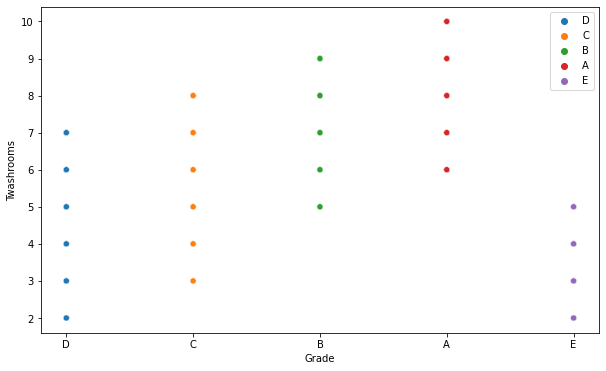

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=house_df,x=house_df['Grade'],y=house_df['Twashrooms'],hue='Grade')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Grade', ylabel='Twashrooms'>

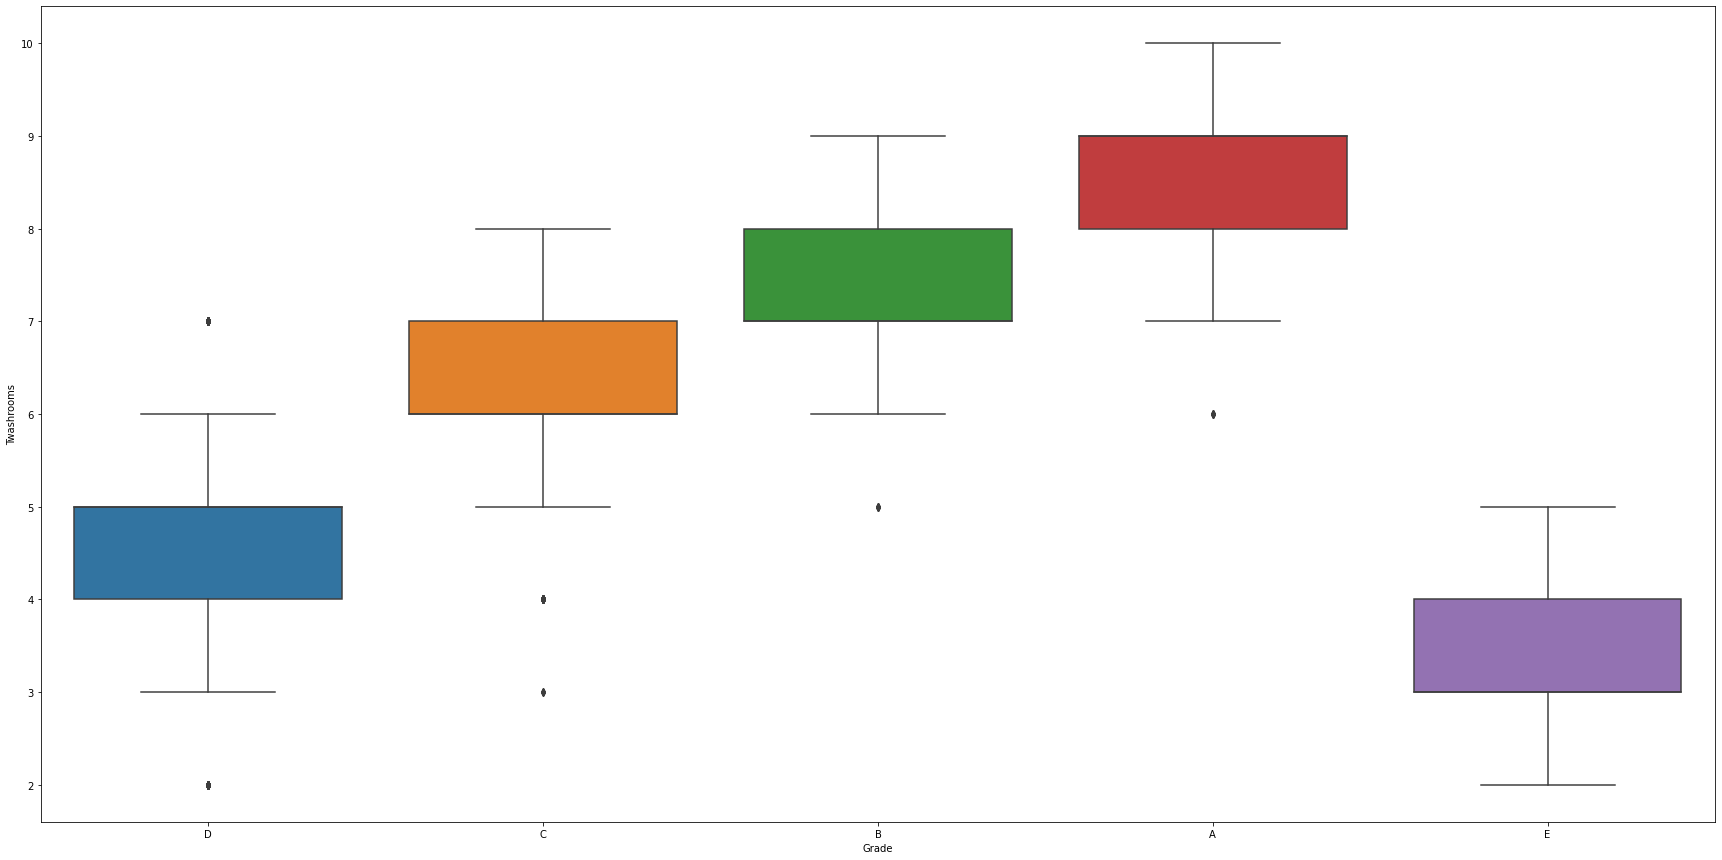

In [52]:
plt.figure(figsize=(30,15))
sns.boxplot(data=house_df,x=house_df['Grade'],y=house_df['Twashrooms'])

#  Grade vs Total rooms 

<AxesSubplot:xlabel='Grade', ylabel='Trooms'>

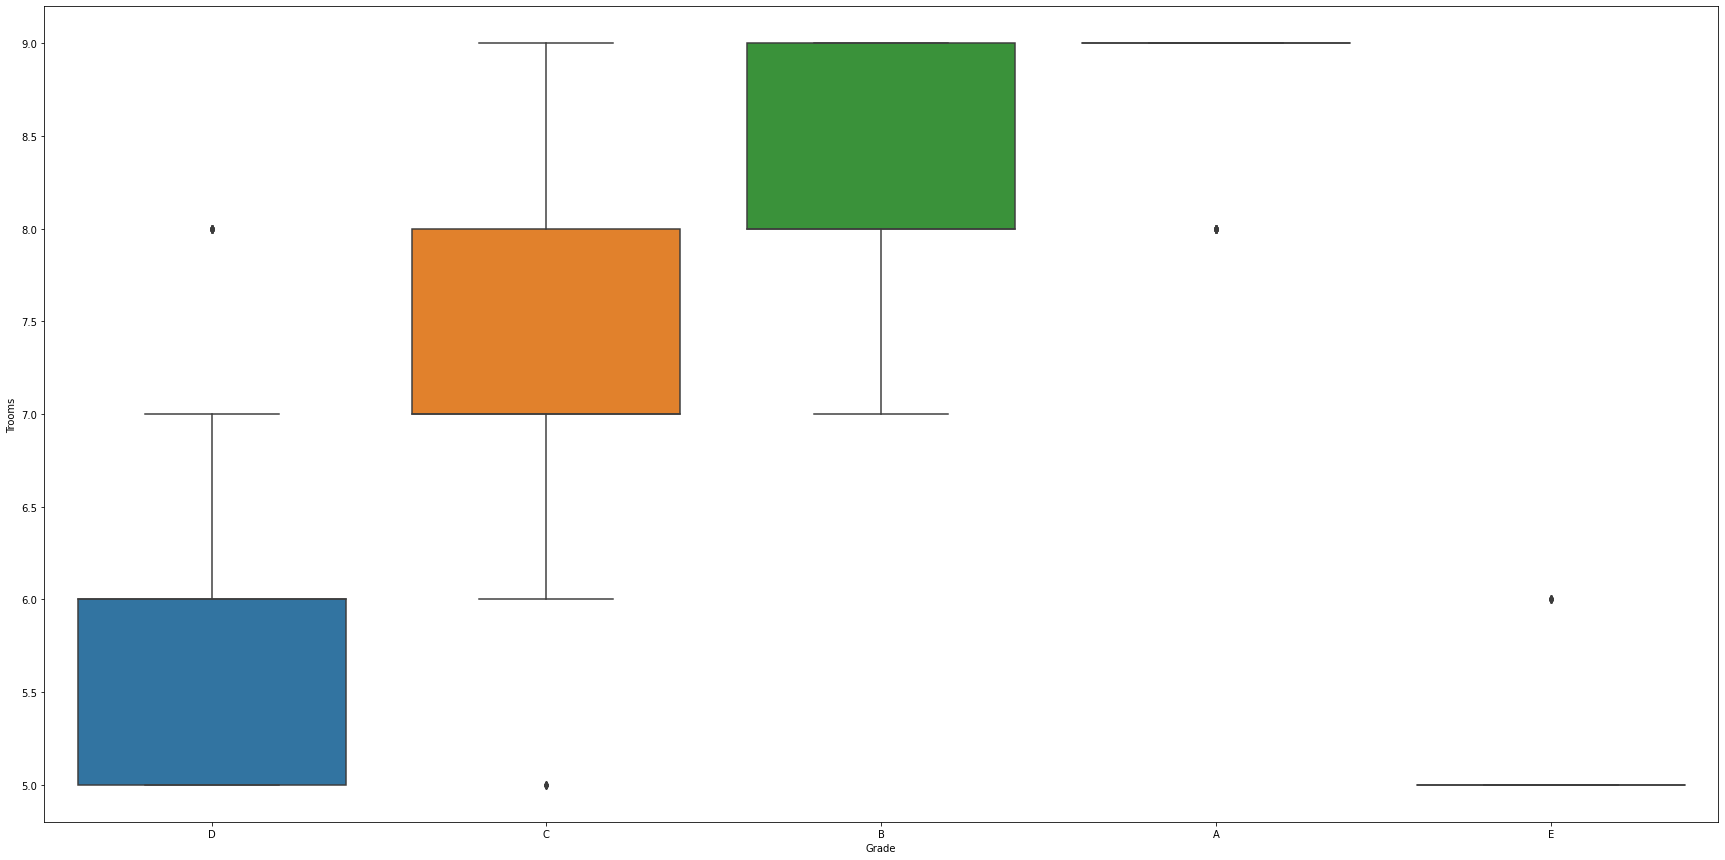

In [53]:
plt.figure(figsize=(30,15))
sns.boxplot(data=house_df,x=house_df['Grade'],y=house_df['Trooms'])

# Analysis of Grade vs Number of floor

<AxesSubplot:xlabel='Grade', ylabel='Nfloors'>

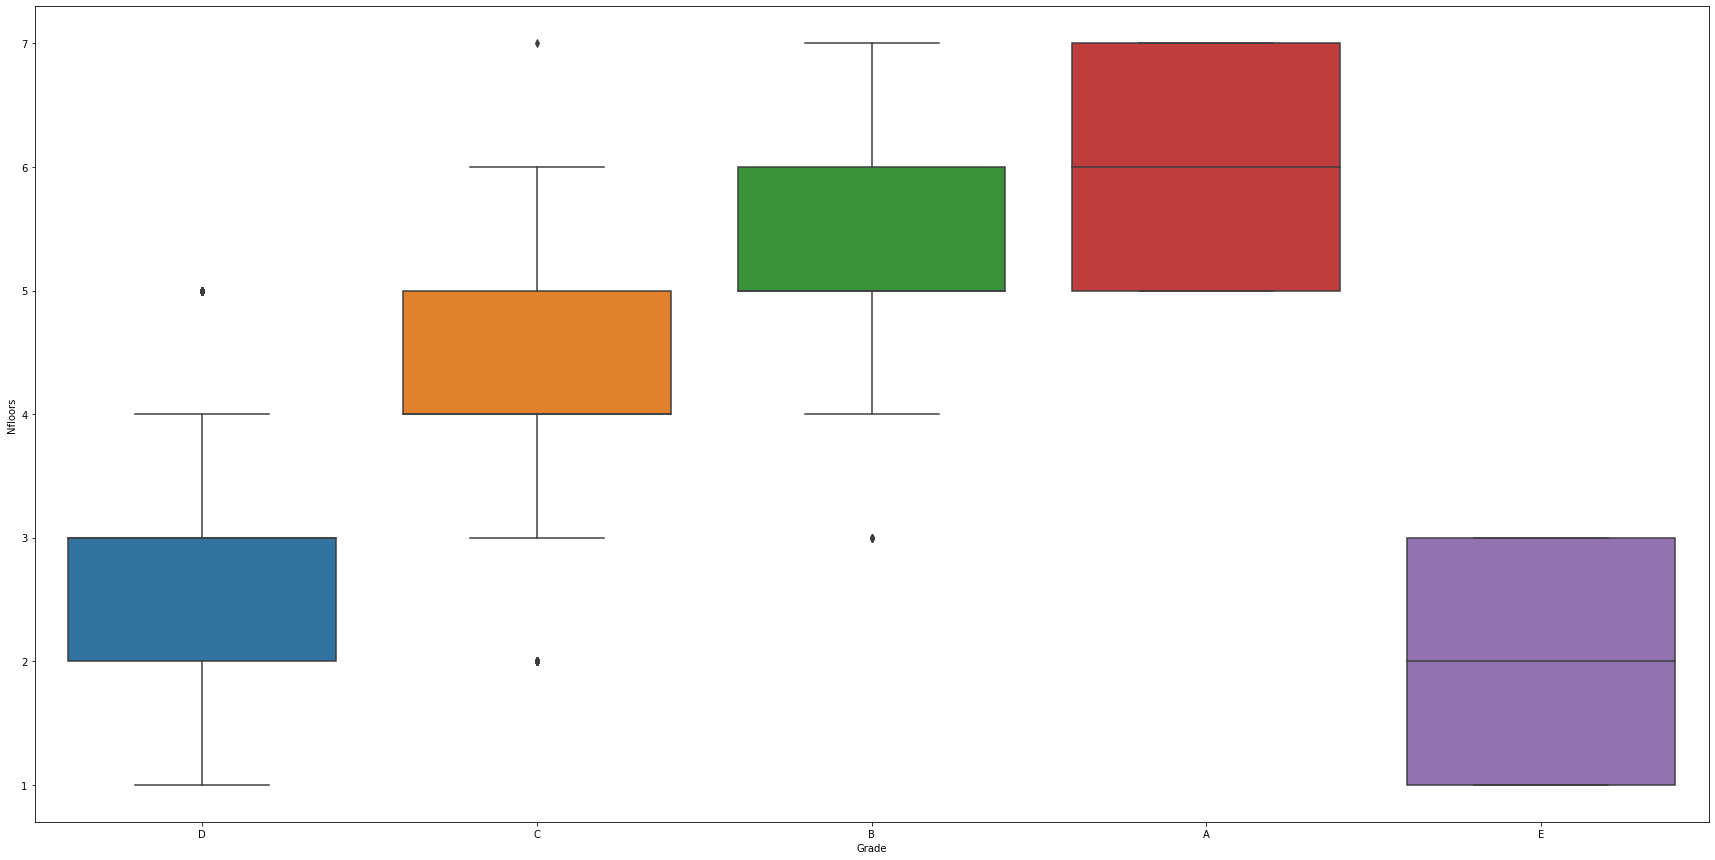

In [54]:
plt.figure(figsize=(30,15))
sns.boxplot(data=house_df,x=house_df['Grade'],y=house_df['Nfloors'])

## Some Joint Plots to see the data 

### Bedrooms | Grade | Expected Price 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1440x432 with 0 Axes>

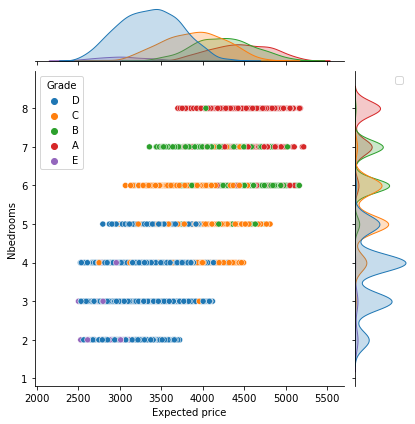

In [55]:
plt.figure(figsize = (20, 6))
sns.jointplot(data=house_df,y='Nbedrooms',x="Expected price",hue='Grade')
plt.legend()

### Area | Grade | Expected Price 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1440x432 with 0 Axes>

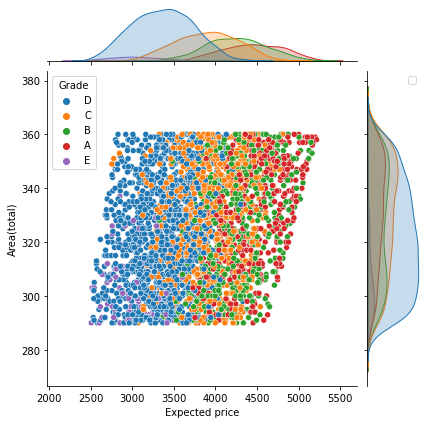

In [56]:
plt.figure(figsize = (20, 6))
sns.jointplot(data=house_df,y='Area(total)',x="Expected price",hue='Grade')
plt.legend()

### Washrooms | Grade | Expected Price 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1440x432 with 0 Axes>

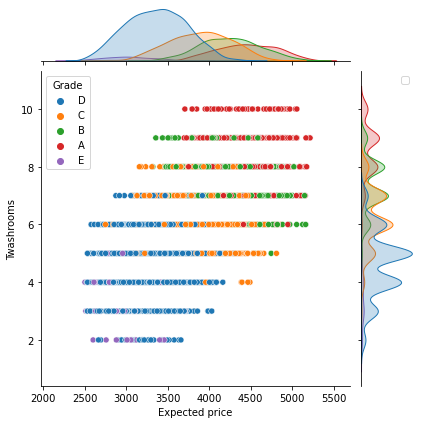

In [57]:
plt.figure(figsize = (20, 6))
sns.jointplot(data=house_df,y='Twashrooms',x="Expected price",hue='Grade')
plt.legend()

# Correlation 

In [58]:
corr=house_df.corr()
corr

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
Area(total),1.000000,0.019041,0.031328,0.031819,0.038509,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507
Trooms,0.019041,1.000000,0.865878,0.827072,0.794870,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170
Nbedrooms,0.031328,0.865878,1.000000,0.956578,0.919158,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687
Nbwashrooms,0.031819,0.827072,0.956578,1.000000,0.960007,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659
Twashrooms,0.038509,0.794870,0.919158,0.960007,1.000000,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627
Roof(Area),0.017029,0.026550,0.025073,0.028832,0.028763,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346
Lawn(Area),-0.002118,0.009557,0.000054,0.006617,0.008386,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561
Nfloors,0.016819,0.862367,0.742132,0.711936,0.684966,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598
API,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575
ANB,-0.010846,0.007321,0.015403,0.008475,0.016492,-0.015529,0.025751,0.020614,-0.025694,1.000000,0.015583


# Heatmap

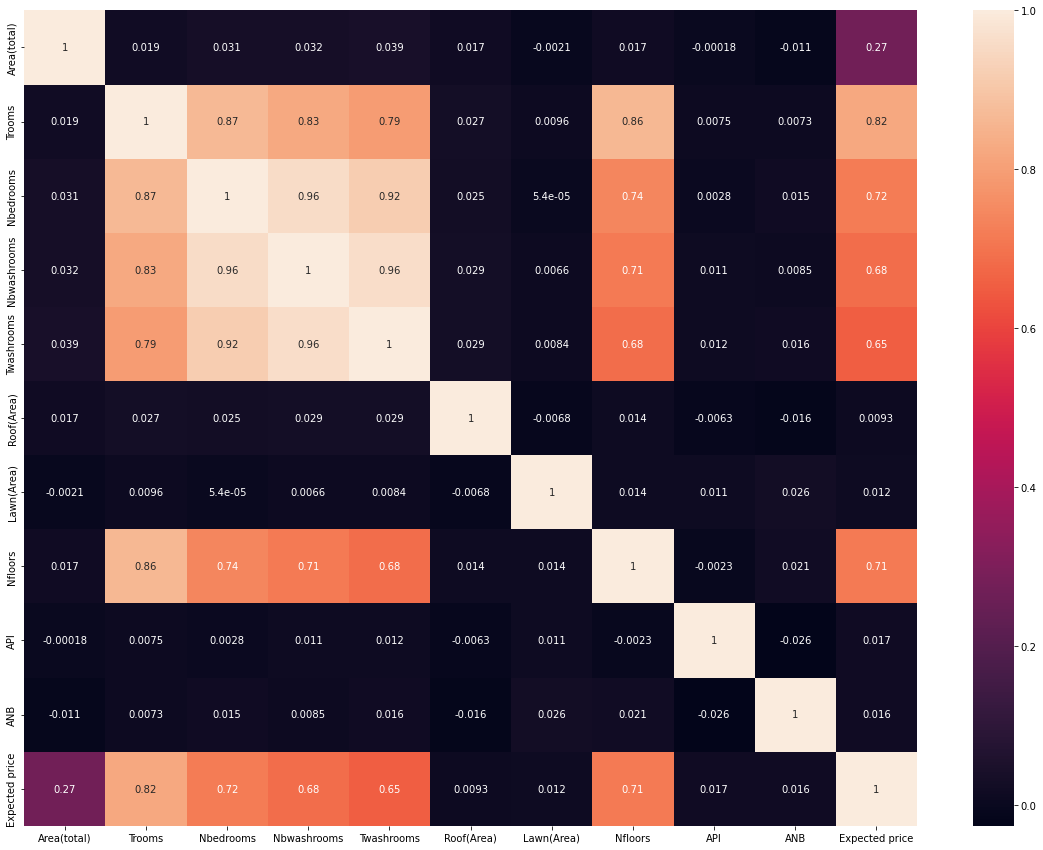

In [59]:
plt.figure(figsize=(20, 15))
sns.heatmap(house_df.corr(),annot=True)
plt.show()

# Preprocessing

# Feature Scaling

In [60]:
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_sales_df_c = house_df.select_dtypes(include='number')
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_sales_df_c.to_numpy()),columns=new_sales_df_c.columns)
    return df_scaled

In [61]:
scale ='minmax'
df_scaled=feature_scale(scale)
df_scaled.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,0.700000,0.25,0.500000,0.428571,0.500,0.000000,0.12,0.166667,0.650000,1.0,0.360251
1,0.971429,0.00,0.333333,0.285714,0.250,0.591667,0.52,0.333333,0.533333,0.6,0.370944
2,0.485714,0.50,0.500000,0.428571,0.375,0.841667,0.94,0.666667,0.400000,0.4,0.458702
3,0.571429,0.25,0.333333,0.285714,0.375,0.841667,0.24,0.166667,0.316667,0.2,0.232301
4,0.428571,0.50,0.333333,0.428571,0.375,0.000000,0.10,0.333333,0.000000,0.0,0.493732


## Label Encoding

In [62]:
label=LabelEncoder()

In [63]:
house_df['Grade']=label.fit_transform(house_df['Grade'])
house_df['roof']=label.fit_transform(house_df['roof'])
house_df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,,,,,,,,,,,,,
1,339,6,5,4,6,0,0,76,2,79,6,3481,3
2,358,5,4,3,4,1,71,96,3,72,4,3510,3
3,324,7,5,4,5,1,101,117,5,64,3,3748,2
4,330,6,4,3,5,1,101,82,2,59,2,3134,3
5,320,7,4,4,5,0,0,75,3,40,1,3843,3


## Test | Train Split 

In [64]:
x=house_df.drop(columns='Grade')
y=house_df['Grade']

# Scaling

In [65]:
scale=StandardScaler()

In [66]:
x1=x.copy()
x2=scale.fit_transform(x1)
x=pd.DataFrame(x2,columns=x1.columns)
x.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319
4,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.029090,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911


## Spliting the Data

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=20)
print(x_train.shape)
print(x_test.shape)

(2100, 12)
(900, 12)


In [68]:
names=[]
result=[]
roc=[]

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [70]:
model_logistic=LogisticRegression()
names.append(model_logistic)

In [71]:
model_logistic.fit(x_train,y_train)
y_log=model_logistic.predict(x_test)
np.unique(y_log)

array([0, 1, 2, 3, 4])

In [72]:
#Intercept
print('The Intercept is =',model_logistic.intercept_)

The Intercept is = [-13.04862186   2.43947242   8.99434846   6.91443589  -5.29963491]


In [73]:
print('The Accuracy Score of the Model =',round(accuracy_score(y_test,y_log),4)*100,'%')

The Accuracy Score of the Model = 95.44 %


In [74]:
model_logistic.coef_

array([[ 3.02577568,  6.50996858,  4.95854078,  3.28717571,  2.6461046 ,
         0.96654165,  2.26700184,  0.83225097,  3.81652615,  2.1065732 ,
         0.31992779,  0.97956297],
       [ 1.83359217,  3.01422734,  1.81010331,  1.24002399,  1.1156181 ,
         0.62038174,  1.24286245,  0.57276816,  1.50238873,  1.27477011,
         0.23193338,  0.38566523],
       [ 0.56248068, -0.51908087, -0.428078  ,  0.1840343 , -0.70824252,
         0.16633586,  0.35114261,  0.18741515, -0.44478678,  0.52627574,
         0.21996159,  0.14308631],
       [-1.57267138, -3.9599345 , -2.47574286, -1.87493541, -1.15206631,
        -0.29246945, -1.36596647, -0.42187531, -2.24267294, -1.04687695,
        -0.15851901, -0.51048267],
       [-3.84917715, -5.04518056, -3.86482323, -2.83629859, -1.90141387,
        -1.4607898 , -2.49504043, -1.17055897, -2.63145515, -2.8607421 ,
        -0.61330375, -0.99783183]])

# Score

In [75]:
print('The Score of Model on Training Dataset =',model_logistic.score(x_train,y_train))

The Score of Model on Training Dataset = 0.9585714285714285


In [76]:
result.append(model_logistic.score(x_test,y_test))
print('The Score of Model on Testing Dataset =',model_logistic.score(x_test,y_test))

The Score of Model on Testing Dataset = 0.9544444444444444


In [77]:
print('The Accuracy Score of the Model =',round(accuracy_score(y_test,y_log),4)*100,'%')

The Accuracy Score of the Model = 95.44 %


# Predictions

In [78]:
predict=model_logistic.predict(x_test)
predict

array([2, 3, 1, 0, 0, 3, 1, 3, 3, 1, 3, 1, 2, 2, 3, 3, 3, 2, 3, 1, 0, 3,
       3, 2, 2, 2, 0, 2, 2, 3, 3, 1, 3, 0, 2, 2, 1, 3, 2, 2, 0, 3, 3, 3,
       1, 2, 2, 2, 3, 3, 2, 3, 3, 1, 3, 3, 1, 2, 3, 2, 2, 2, 4, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 0, 0, 3, 0, 3, 3, 3, 1, 3, 3, 0, 1, 1, 0, 2, 1,
       1, 2, 1, 0, 3, 2, 3, 3, 2, 0, 3, 4, 3, 2, 2, 1, 3, 2, 0, 2, 1, 2,
       1, 3, 3, 1, 3, 2, 3, 3, 3, 0, 0, 0, 4, 0, 3, 2, 3, 0, 0, 3, 3, 3,
       3, 4, 2, 2, 0, 2, 3, 1, 3, 2, 1, 2, 4, 2, 2, 3, 2, 1, 3, 3, 3, 1,
       3, 3, 0, 3, 0, 4, 2, 3, 0, 3, 3, 1, 3, 2, 3, 1, 0, 3, 3, 3, 1, 2,
       3, 0, 0, 0, 3, 3, 0, 2, 3, 3, 1, 1, 2, 2, 3, 0, 1, 3, 0, 3, 3, 3,
       3, 3, 2, 3, 0, 1, 1, 1, 0, 3, 2, 3, 1, 0, 3, 3, 3, 0, 2, 1, 1, 1,
       3, 2, 2, 3, 2, 3, 1, 2, 1, 3, 3, 3, 2, 0, 3, 3, 3, 4, 3, 3, 3, 2,
       0, 3, 2, 0, 2, 2, 1, 1, 1, 1, 3, 2, 1, 3, 3, 2, 3, 3, 3, 0, 3, 4,
       2, 1, 3, 2, 3, 0, 4, 0, 3, 3, 0, 2, 1, 0, 1, 2, 1, 3, 1, 2, 2, 4,
       3, 3, 3, 3, 1, 3, 1, 1, 3, 0, 3, 0, 1, 3, 3,

In [79]:
y_test=list(y_test)
predict=list(predict)

In [80]:
df=pd.DataFrame({"Actual value":y_test,"Predicted Value":predict})
df

,Actual value,Predicted Value
0,2,2
1,3,3
2,1,1
3,0,0
4,0,0
...,...,...
895,3,3
896,3,3
897,2,2
898,0,0


# Model Evaluation

In [81]:
print("Confusion matrix: \n",confusion_matrix(y_test,predict))

Confusion matrix: 
 [[125   8   0   0   0]
 [  3 143   8   0   0]
 [  0   8 193   8   0]
 [  0   0   4 380   1]
 [  0   0   0   1  18]]


<AxesSubplot:>

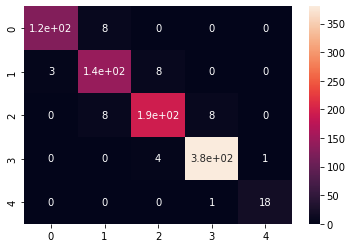

In [82]:
sns.heatmap(confusion_matrix(y_test,predict),annot=True)

In [83]:
print('accuracy:', accuracy_score(y_test, predict))
print('recall:', recall_score(y_test,predict,average='weighted'))
print('f1-score:', f1_score(y_test,predict,average='weighted'))
print('precision:', precision_score(y_test, predict,average='weighted'))

accuracy: 0.9544444444444444
recall: 0.9544444444444444
f1-score: 0.9544568899750151
precision: 0.9547159508886346


In [84]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       133
           1       0.90      0.93      0.91       154
           2       0.94      0.92      0.93       209
           3       0.98      0.99      0.98       385
           4       0.95      0.95      0.95        19

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
model_decision=DecisionTreeClassifier()

In [87]:
names.append(model_decision)

In [88]:
model_decision.fit(x_train,y_train)
y_d=model_decision.predict(x_test)
np.unique(y_d)

array([0, 1, 2, 3, 4])

# Score

In [89]:
print('The Score of Model on Training Dataset : ',model_decision.score(x_train,y_train))

The Score of Model on Training Dataset :  1.0


In [90]:
result.append(model_decision.score(x_test,y_test))
print('The Score of Model on Testing Data =',model_decision.score(x_test,y_test))

The Score of Model on Testing Data = 0.8533333333333334


In [91]:
print('The Accuracy Score of the Model =',round(accuracy_score(y_test,y_d),4)*100,'%')

The Accuracy Score of the Model = 85.33 %


# Feature Importance

In [92]:
model_decision.feature_importances_

array([0.11420244, 0.37020569, 0.17828259, 0.03763868, 0.02926259,
       0.02614717, 0.07198386, 0.03834673, 0.03041311, 0.06519507,
       0.01074402, 0.02757804])

In [93]:
pd.DataFrame(model_decision.feature_importances_,index=x.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False)

,Feature Importances
Trooms,0.370206
Nbedrooms,0.178283
Area(total),0.114202
Roof(Area),0.071984
API,0.065195
Lawn(Area),0.038347
Nbwashrooms,0.037639
Nfloors,0.030413
Twashrooms,0.029263
Expected price,0.027578


# Matrix

[[112  21   0   0   0]
 [ 21 118  15   0   0]
 [  0  16 170  23   0]
 [  0   0  17 357  11]
 [  0   0   0   8  11]]
 Plot of Confusion Matrix =


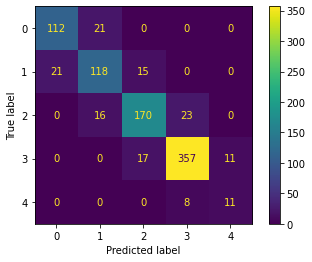

In [94]:
print(confusion_matrix(y_test,y_d))
print(' Plot of Confusion Matrix =')
plot_confusion_matrix(model_decision,x_test,y_test)
plt.show()

# Classification 

In [95]:
print(classification_report(y_test,y_d))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       133
           1       0.76      0.77      0.76       154
           2       0.84      0.81      0.83       209
           3       0.92      0.93      0.92       385
           4       0.50      0.58      0.54        19

    accuracy                           0.85       900
   macro avg       0.77      0.79      0.78       900
weighted avg       0.85      0.85      0.85       900



# Plot Decision Tree

In [96]:
from sklearn.tree import plot_tree

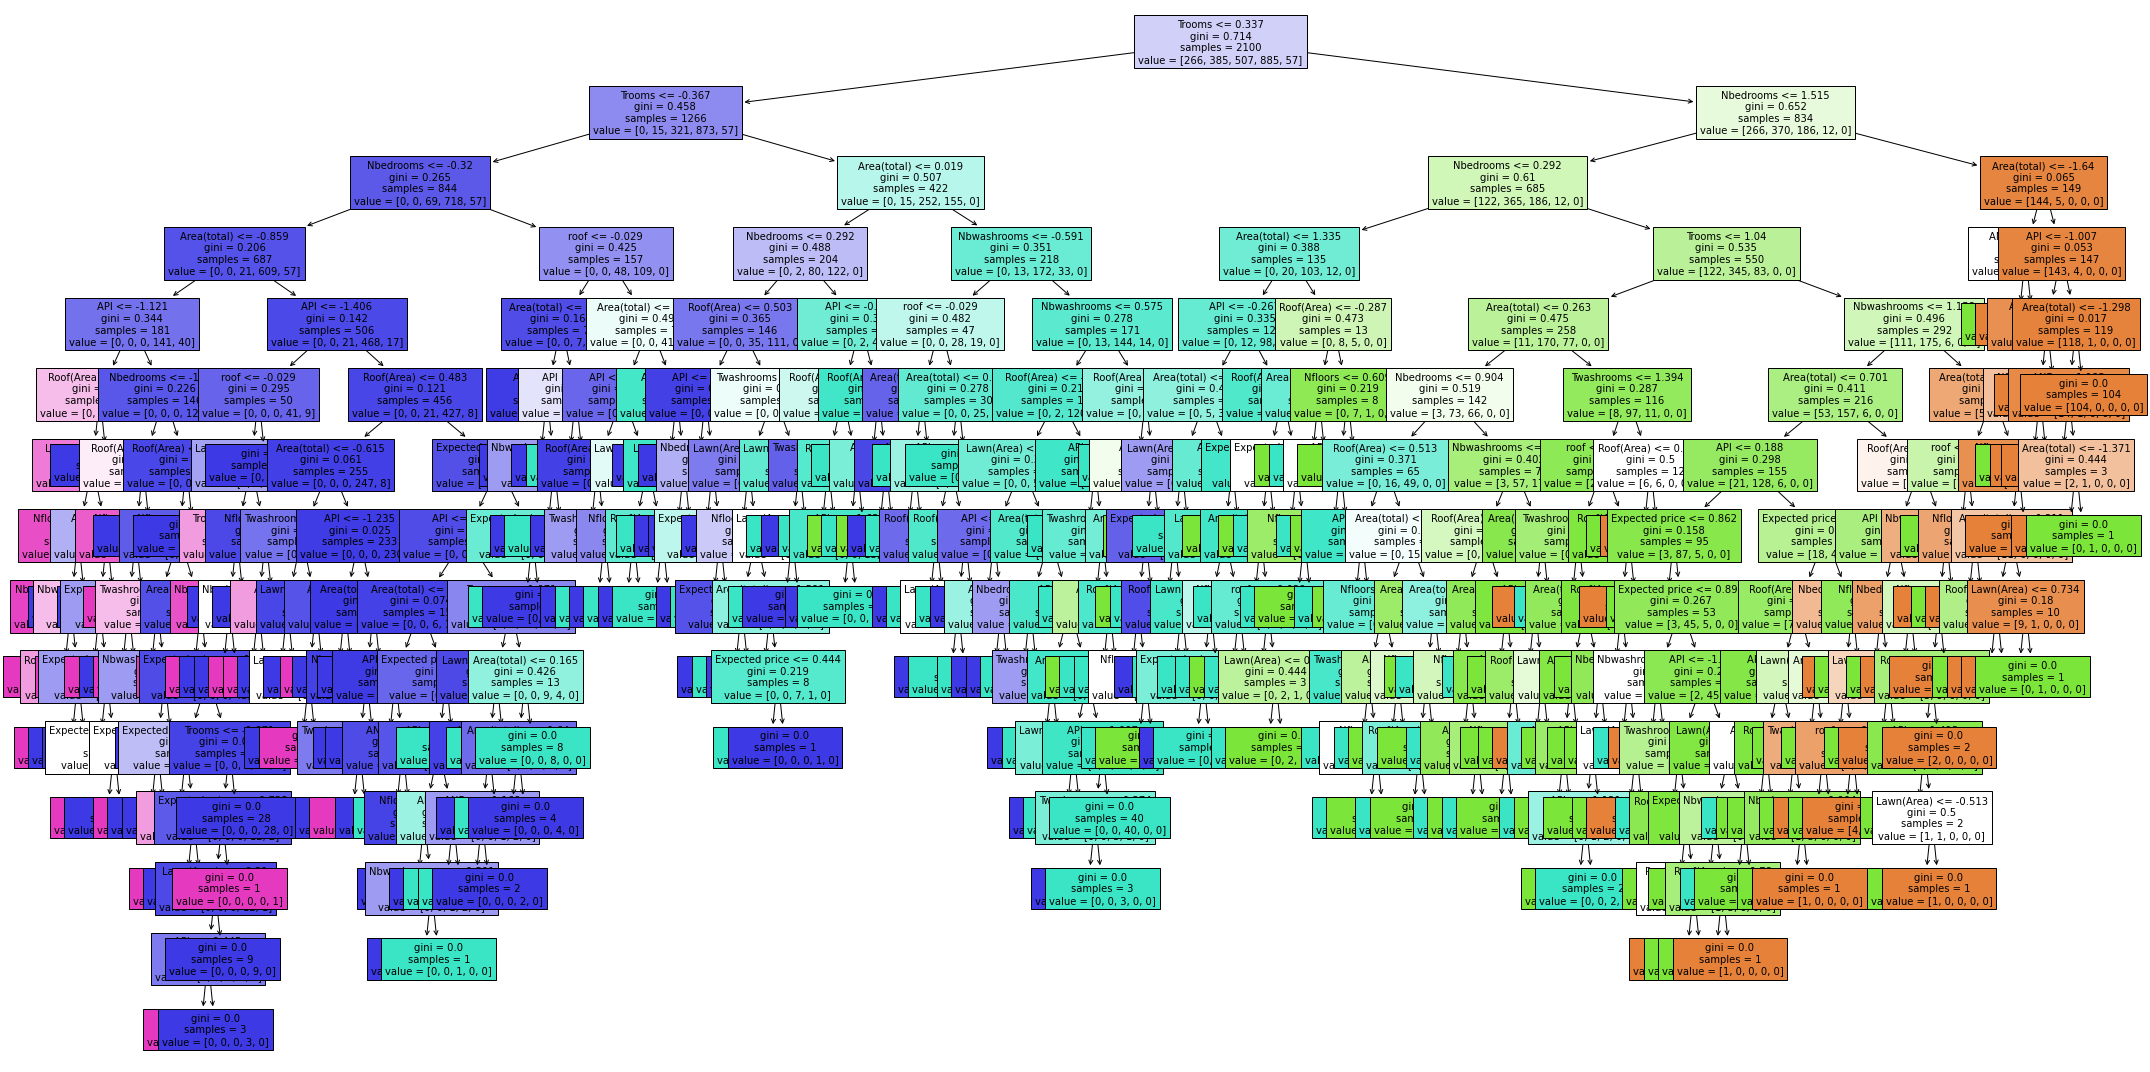

In [97]:
plt.figure(figsize=(30,15))
plot_tree(model_decision,fontsize=10,feature_names=x.columns,filled=True)
plt.tight_layout()
plt.show()

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [99]:
model_random=RandomForestClassifier()

In [100]:
names.append(model_random)

In [101]:
model_random.fit(x_train,y_train)
y_r=model_random.predict(x_test)
np.unique(y_r)

array([0, 1, 2, 3, 4])

# Score

In [102]:
print('The Score of Model on training Data =',model_random.score(x_train,y_train))

The Score of Model on training Data = 1.0


In [103]:
result.append(model_random.score(x_test,y_test))
print('The Score of model on testing Data= ',model_random.score(x_test,y_test))

The Score of model on testing Data=  0.8988888888888888


In [104]:
print('The Accuracy Score of the Model =',round(accuracy_score(y_test,y_r),4)*100,'%')

The Accuracy Score of the Model = 89.89 %


# Feature Importance

In [105]:
model_random.feature_importances_

array([0.09782268, 0.1898296 , 0.12418193, 0.1199316 , 0.07631981,
       0.02473757, 0.05103837, 0.04652636, 0.0740798 , 0.06532919,
       0.02190668, 0.10829639])

In [106]:
model_random.base_estimator_

DecisionTreeClassifier()

In [107]:
pd.DataFrame(model_random.feature_importances_,index=x.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False)

,Feature Importances
Trooms,0.189830
Nbedrooms,0.124182
Nbwashrooms,0.119932
Expected price,0.108296
Area(total),0.097823
Twashrooms,0.076320
Nfloors,0.074080
API,0.065329
Roof(Area),0.051038
Lawn(Area),0.046526


# Matrix 

[[113  20   0   0   0]
 [ 10 127  17   0   0]
 [  0   7 180  22   0]
 [  0   0   7 377   1]
 [  0   0   0   7  12]]
 Plot of Confusion Matrix =


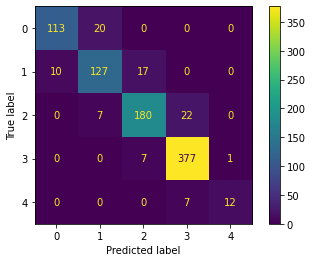

In [108]:
print(confusion_matrix(y_test,y_r))
print(' Plot of Confusion Matrix =')
plot_confusion_matrix(model_random,x_test,y_test)
plt.show()

# Classification

In [109]:
print(classification_report(y_test,y_r))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       133
           1       0.82      0.82      0.82       154
           2       0.88      0.86      0.87       209
           3       0.93      0.98      0.95       385
           4       0.92      0.63      0.75        19

    accuracy                           0.90       900
   macro avg       0.90      0.83      0.86       900
weighted avg       0.90      0.90      0.90       900



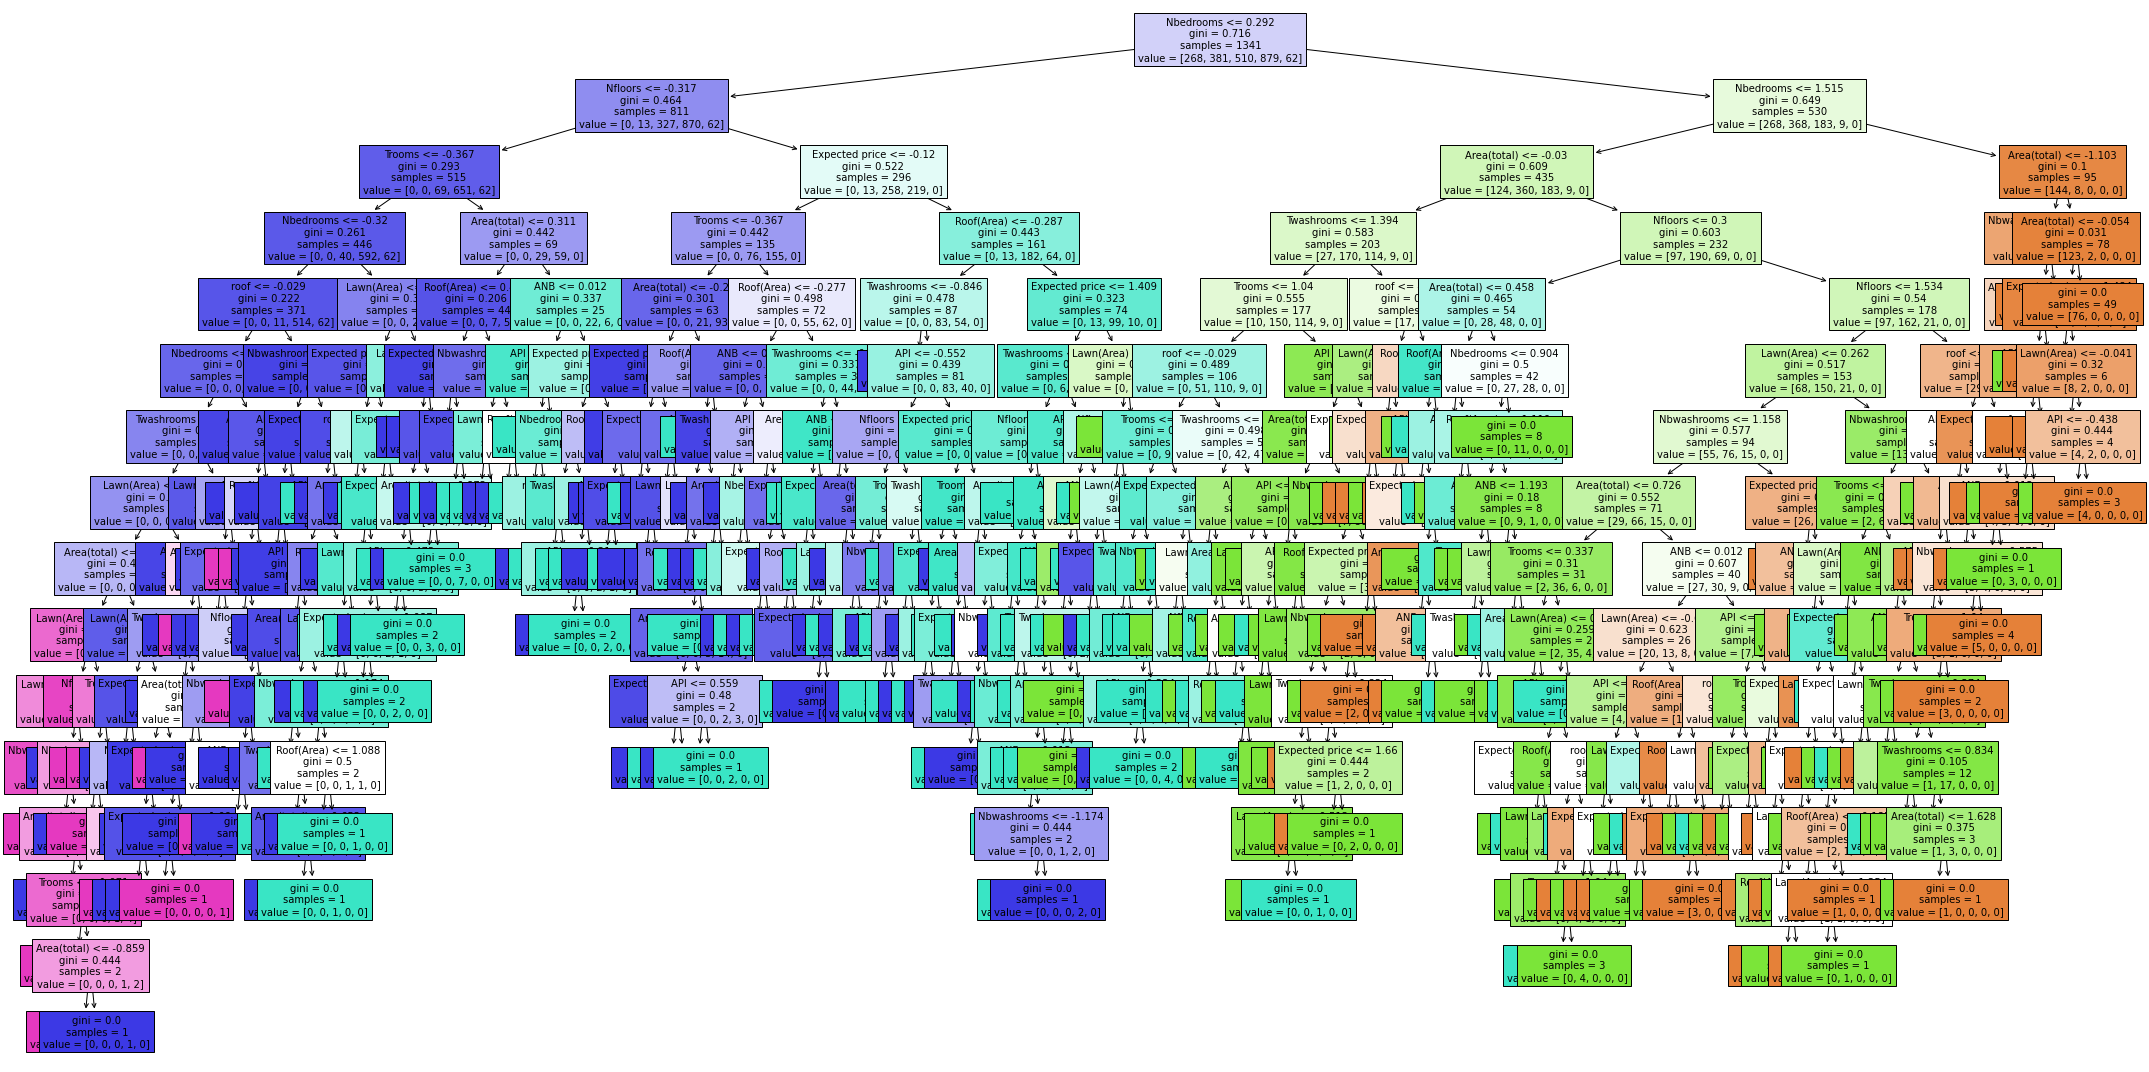

In [110]:
plt.figure(figsize=(30,15))
plot_tree(model_random[0],fontsize=10,feature_names=x.columns,filled=True)
plt.tight_layout()
plt.show()

# SVC

In [111]:
model_svc=SVC()

In [112]:
names.append(model_svc)

# Score

In [113]:
from collections import Counter
model_svc.fit(x_train,y_train)

y_svc=model_svc.predict(x_test)

print('Unique Classes')
print(np.unique(y_svc),'\n')

x=np.unique(y_svc)

count=Counter(y_svc)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Unique Classes
[0 1 2 3 4] 

Class 0 : 133 
Class 1 : 159 
Class 2 : 200 
Class 3 : 393 
Class 4 : 15 


In [114]:
print('The Score of Model on Training Dataset : ',model_svc.score(x_train,y_train))
result.append(model_svc.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_svc.score(x_test,y_test))
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_svc),4)*100,'%')

The Score of Model on Training Dataset :  0.97
The Score of Model on Testing Dataset :  0.9322222222222222
The Accuracy Score of the Model :  93.22 %


In [115]:
model_svc.intercept_

array([-0.68250111, -0.04197577, -0.163243  ,  0.19045134,  0.61215721,
        0.07635841,  0.28453267,  0.30270516,  0.37584075,  1.28268403])

In [116]:
model_svc.get_params

<bound method BaseEstimator.get_params of SVC()>

# Matrix

[[122  11   0   0   0]
 [ 11 135   8   0   0]
 [  0  13 187   9   0]
 [  0   0   5 380   0]
 [  0   0   0   4  15]]
Plot of Confusion Matrix =


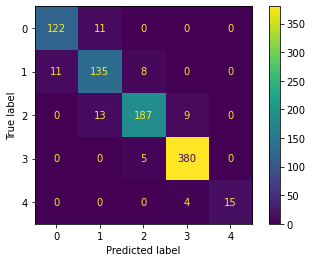

In [117]:
print(confusion_matrix(y_test,y_svc))
print('Plot of Confusion Matrix =')
plot_confusion_matrix(model_svc,x_test,y_test)
plt.show()

# Classification

In [118]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       133
           1       0.85      0.88      0.86       154
           2       0.94      0.89      0.91       209
           3       0.97      0.99      0.98       385
           4       1.00      0.79      0.88        19

    accuracy                           0.93       900
   macro avg       0.93      0.89      0.91       900
weighted avg       0.93      0.93      0.93       900



# AdaBoostClassifier

In [119]:
model_adac=AdaBoostClassifier()
names.append(model_adac)

In [120]:
model_adac.fit(x_train,y_train)
y_adac=model_adac.predict(x_test)
print('Unique Classes')
print(np.unique(y_adac),'\n')
x=np.unique(y_adac)
count=Counter(y_adac)
for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Unique Classes
[1 2 3 4] 

Class 1 : 317 
Class 2 : 103 
Class 3 : 349 
Class 4 : 131 


In [121]:
print('The Score of Model on Training Data =',model_adac.score(x_train,y_train))
result.append(model_adac.score(x_test,y_test))
print('The Score of Model on Testing Data =',model_adac.score(x_test,y_test))
print('The Accuracy Score of the Model =',round(accuracy_score(y_test,y_adac),4)*100,'%')

The Score of Model on Training Data = 0.6014285714285714
The Score of Model on Testing Data = 0.5566666666666666
The Accuracy Score of the Model = 55.669999999999995 %


# COMPARING

### Logistic Regression

In [122]:
print('The Score of Model on Training Dataset =',model_logistic.score(x_train,y_train))

The Score of Model on Training Dataset = 0.9585714285714285


In [123]:
result.append(model_logistic.score(x_test,y_test))
print('The Score of Model on Testing Dataset =',model_logistic.score(x_test,y_test))

The Score of Model on Testing Dataset = 0.9544444444444444


In [124]:
print('The Accuracy Score of the Model =',round(accuracy_score(y_test,y_log),4)*100,'%')

The Accuracy Score of the Model = 95.44 %


# Decision Tree

In [125]:
print('The Score of Model on Training Dataset : ',model_decision.score(x_train,y_train))

The Score of Model on Training Dataset :  1.0


In [126]:
result.append(model_decision.score(x_test,y_test))
print('The Score of Model on Testing Data =',model_decision.score(x_test,y_test))

The Score of Model on Testing Data = 0.8533333333333334


In [127]:
print('The Accuracy Score of the Model =',round(accuracy_score(y_test,y_d),4)*100,'%')

The Accuracy Score of the Model = 85.33 %


# Random Forest

In [128]:
print('The Score of Model on training Data =',model_random.score(x_train,y_train))

The Score of Model on training Data = 1.0


In [129]:
result.append(model_random.score(x_test,y_test))
print('The Score of model on testing Data= ',model_random.score(x_test,y_test))

The Score of model on testing Data=  0.8988888888888888


In [130]:
print('The Accuracy Score of the Model =',round(accuracy_score(y_test,y_r),4)*100,'%')

The Accuracy Score of the Model = 89.89 %


# SVC

In [131]:
print('The Score of Model on Training Dataset : ',model_svc.score(x_train,y_train))
result.append(model_svc.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_svc.score(x_test,y_test))
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_svc),4)*100,'%')

The Score of Model on Training Dataset :  0.97
The Score of Model on Testing Dataset :  0.9322222222222222
The Accuracy Score of the Model :  93.22 %


# AdaBoostClassfier

In [132]:
print('The Score of Model on Training Data =',model_adac.score(x_train,y_train))
result.append(model_adac.score(x_test,y_test))
print('The Score of Model on Testing Data =',model_adac.score(x_test,y_test))
print('The Accuracy Score of the Model =',round(accuracy_score(y_test,y_adac),4)*100,'%')

The Score of Model on Training Data = 0.6014285714285714
The Score of Model on Testing Data = 0.5566666666666666
The Accuracy Score of the Model = 55.669999999999995 %


# conclusion

###  Model Logistic Regression is having the most highest score of 95.44% and it is higher then other model score.Logistic Regression  model have the most mininum error